# Assignment 3

In [218]:
#install.packages("bayestestR")
#install.packages("emdbook")

Installing package into ‘/home/maryam/R/x86_64-pc-linux-gnu-library/4.2’
(as ‘lib’ is unspecified)



In [2]:
library(tidyverse)
library(ggplot2)
library(dplyr)
library(bayestestR)
library(emdbook)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.1     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.1     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
May the fourth be with you!



## Exdersice 1

Study the binomial inference for a study that reports y = 7 successes in n = 20 independent trial. Assume the following priors:
- a uniform distribution\
- a Jeffrey’s prior\
- a step function:\

$$
g(\pi) =

    \begin{cases}
        \pi       \hspace{14 mm} \text{if} \hspace{5 mm} \pi ≤ 0.2 \\
        0.2       \hspace{12 mm} \text{if} \hspace{5 mm} 0.2 < \pi ≤ 0.3 \\
        0.5 − \pi \hspace{6  mm} \text{if} \hspace{5 mm} 0.3 < \pi ≤ 0.5 \\
        0         \hspace{15 mm} \text{if} \hspace{5 mm} 0.5 < \pi
    \end{cases}
$$

 - plot the posterior distribution and summarize the results computing the first two moments\
 - compute a 95% credibility interval and give the results in a summary table\
 - draw the limits on the plot of the posterior distribution



In [280]:
n_succ <- 7 #number of success
n <- 20
p <- seq(from=0, 1, length.out=1000)

#implement prior for each distribution
prior_u <- function(x){    #uniform distribution
    g <- dunif(x,0,1)
    return (g)
}

prior_j <- function(x){     #jeffery's prior
    g<- dbeta(x,0.5,0.5)
    return (g)
}

prior_s <- function(x){     #step function
    g<- ifelse(x<= 0.2, x,
        ifelse(x>0.2 & x<=0.3, 0.2, 
            ifelse(x>0.3 & x<= 0.5, 0.5-x, 0)))
    return (g)
}

#implement likelihood
like <- function(x){
    l <- dbinom(n_succ, n, x)*choose(n , n_succ)        #likelihood is binomial and it's the same for all of them
    return (l)
}


# normalization each of them

norm_u <- integrate(
    function(x){like(x)*prior_u(x)},        #uniform
    lower = 0 , upper = 1)$value

norm_j <- integrate(
    function(x){like(x)*prior_j(x)},        #jeffery
    lower = 0 , upper = 1)$value

norm_s <- integrate(
    function(x){like(x)*prior_s(x)},        #step
    lower = 0 , upper = 1)$value



#implement posterior

post_u <- function(x){
    m <- (like(x)*prior_u(x))/norm_u      #uniform
    return (m)
}

p_u <- post_u(p)

post_j <- function(x){
    m <- (like(x)*prior_j(x))/norm_j      #jeffery
    return (m)
}

p_j <- post_j(p)

post_s <- function(x){
    m <- (like(x)*prior_s(x))/norm_s      #step
    return (m)
}

p_s <- post_s(p)



 - plot the posterior distribution and summarize the results computing the first two moments

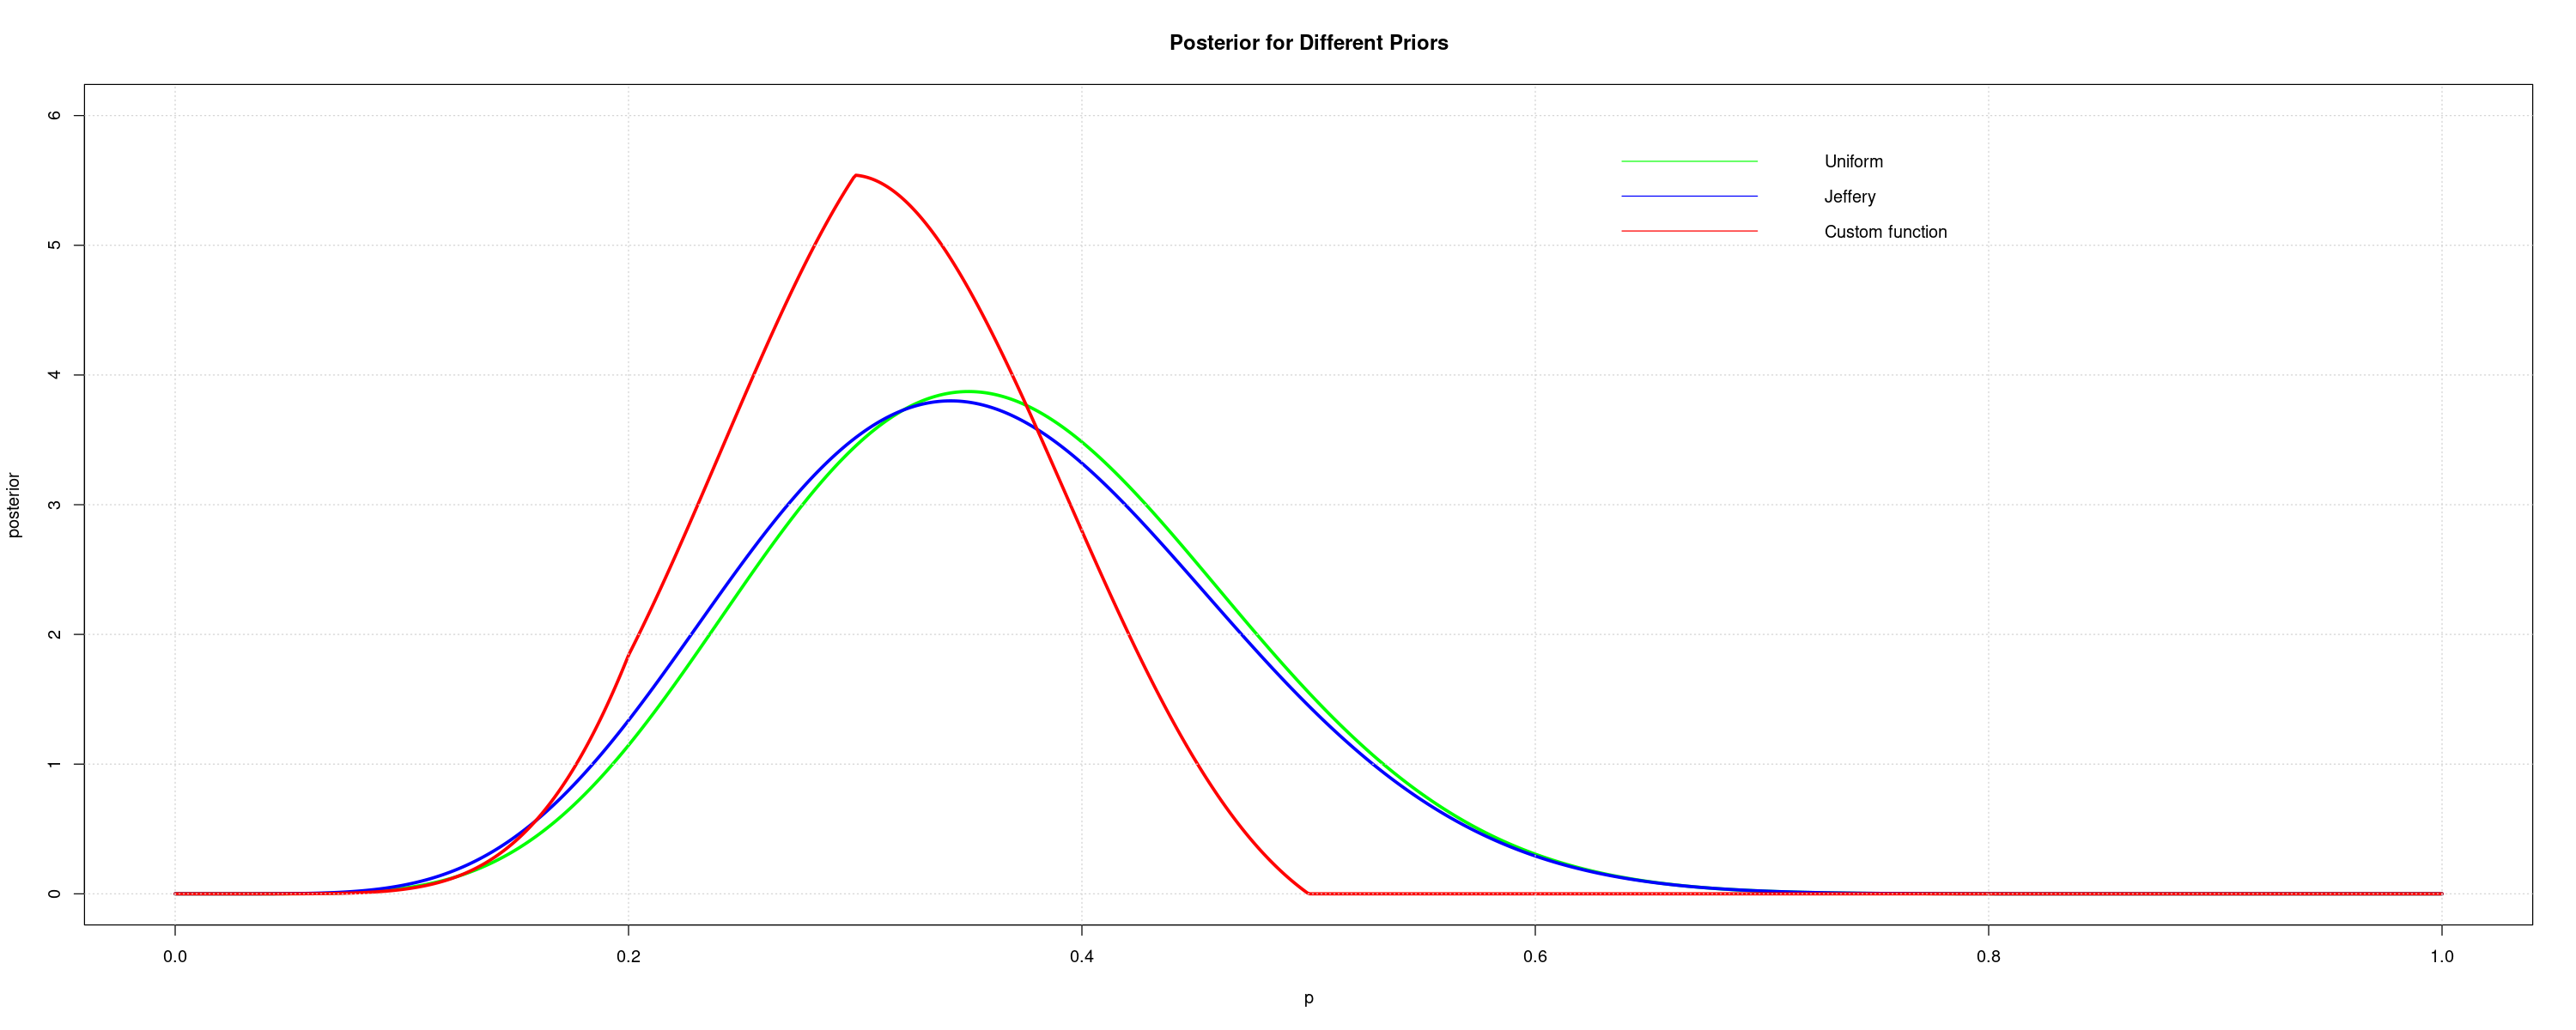

In [457]:
p_j[is.nan(p_j)] = 0 #some of the values was NAN and we had error for plotting so put zero instead of them

data <- data.frame(p , p_u , p_j , p_s)

plot(p, p_u, col='green', type='l', lty=1, lwd=3, xlab="p", ylab="posterior", ylim=c(0, 6), main=("Posterior for Different Priors" ))
    lines(p, p_j, col='blue', type='l', lty=1, lwd=3)
    lines(p, p_s, col='red', type='l', lty=1, lwd=3)

    legend("topright", inset=0.05,legend=c("Uniform", "Jeffery", "Custom function"), col=c("green", "blue", "red"), lty=1:1,box.lty=0)
    grid()

In [282]:
# compute first two moment for each 

first_u <- integrate(function(x){x*post_u(x)} ,      #tuniform moments   
    lower = 0, upper = 1)$value
second_u <- integrate(function(x){((first_u-x)**2)*post_u(x)} , 
    lower = 0, upper = 1)$value

first_j <- integrate(function(x){x*post_j(x)} ,      #jeffery's moments
    lower = 0, upper = 1)$value
second_j <- integrate(function(x){((first_j-x)**2)*post_j(x)} , 
    lower = 0, upper = 1)$value

first_s <- integrate(function(x){x*post_s(x)} ,      #custom function moments
    lower = 0, upper = 1)$value
second_s <- integrate(function(x){((first_s-x)**2)*post_s(x)} , 
    lower = 0, upper = 1)$value

- compute a 95% credibility interval and give the results in a summary table

In [320]:

x_u = ncredint(pvec=p, npost=p_u,level=0.95,tol=0.01,verbose=FALSE)
x_j = ncredint(pvec=p, npost=p_j,level=0.95,tol=0.01,verbose=FALSE)
x_s = ncredint(pvec=p, npost=p_s,level=0.95,tol=0.01,verbose=FALSE)

uniform = c("Uniform",'Binomial',first_u, second_u, x_u[['lower']], x_u[['upper']])
jeffrey = c('Beta','Beta',first_j, second_j, x_j[['lower']], x_j[['upper']])
custom = c('Step function','Integral',first_s, second_s, x_s[['lower']], x_s[['upper']])


df = data.frame( Uniform = uniform, Jeffrey = jeffrey, Custom=custom,
          row.names=c('Prior','Posterior','First moment', 'Second moment', 'Lower limit', 'Upper limit'))
df
     


,Uniform,Jeffrey,Custom
,<chr>,<chr>,<chr>
Prior,Uniform,Beta,Step function
Posterior,Binomial,Beta,Integral
First moment,0.363636363636364,0.357142857147609,0.312045223095267
Second moment,0.0100610851598994,0.0104359925769664,0.00499842846923846
Lower limit,0.174174174174174,0.164164164164164,0.178178178178178
Upper limit,0.560560560560561,0.557557557557558,0.449449449449449


 - draw the limits on the plot of the posterior distribution

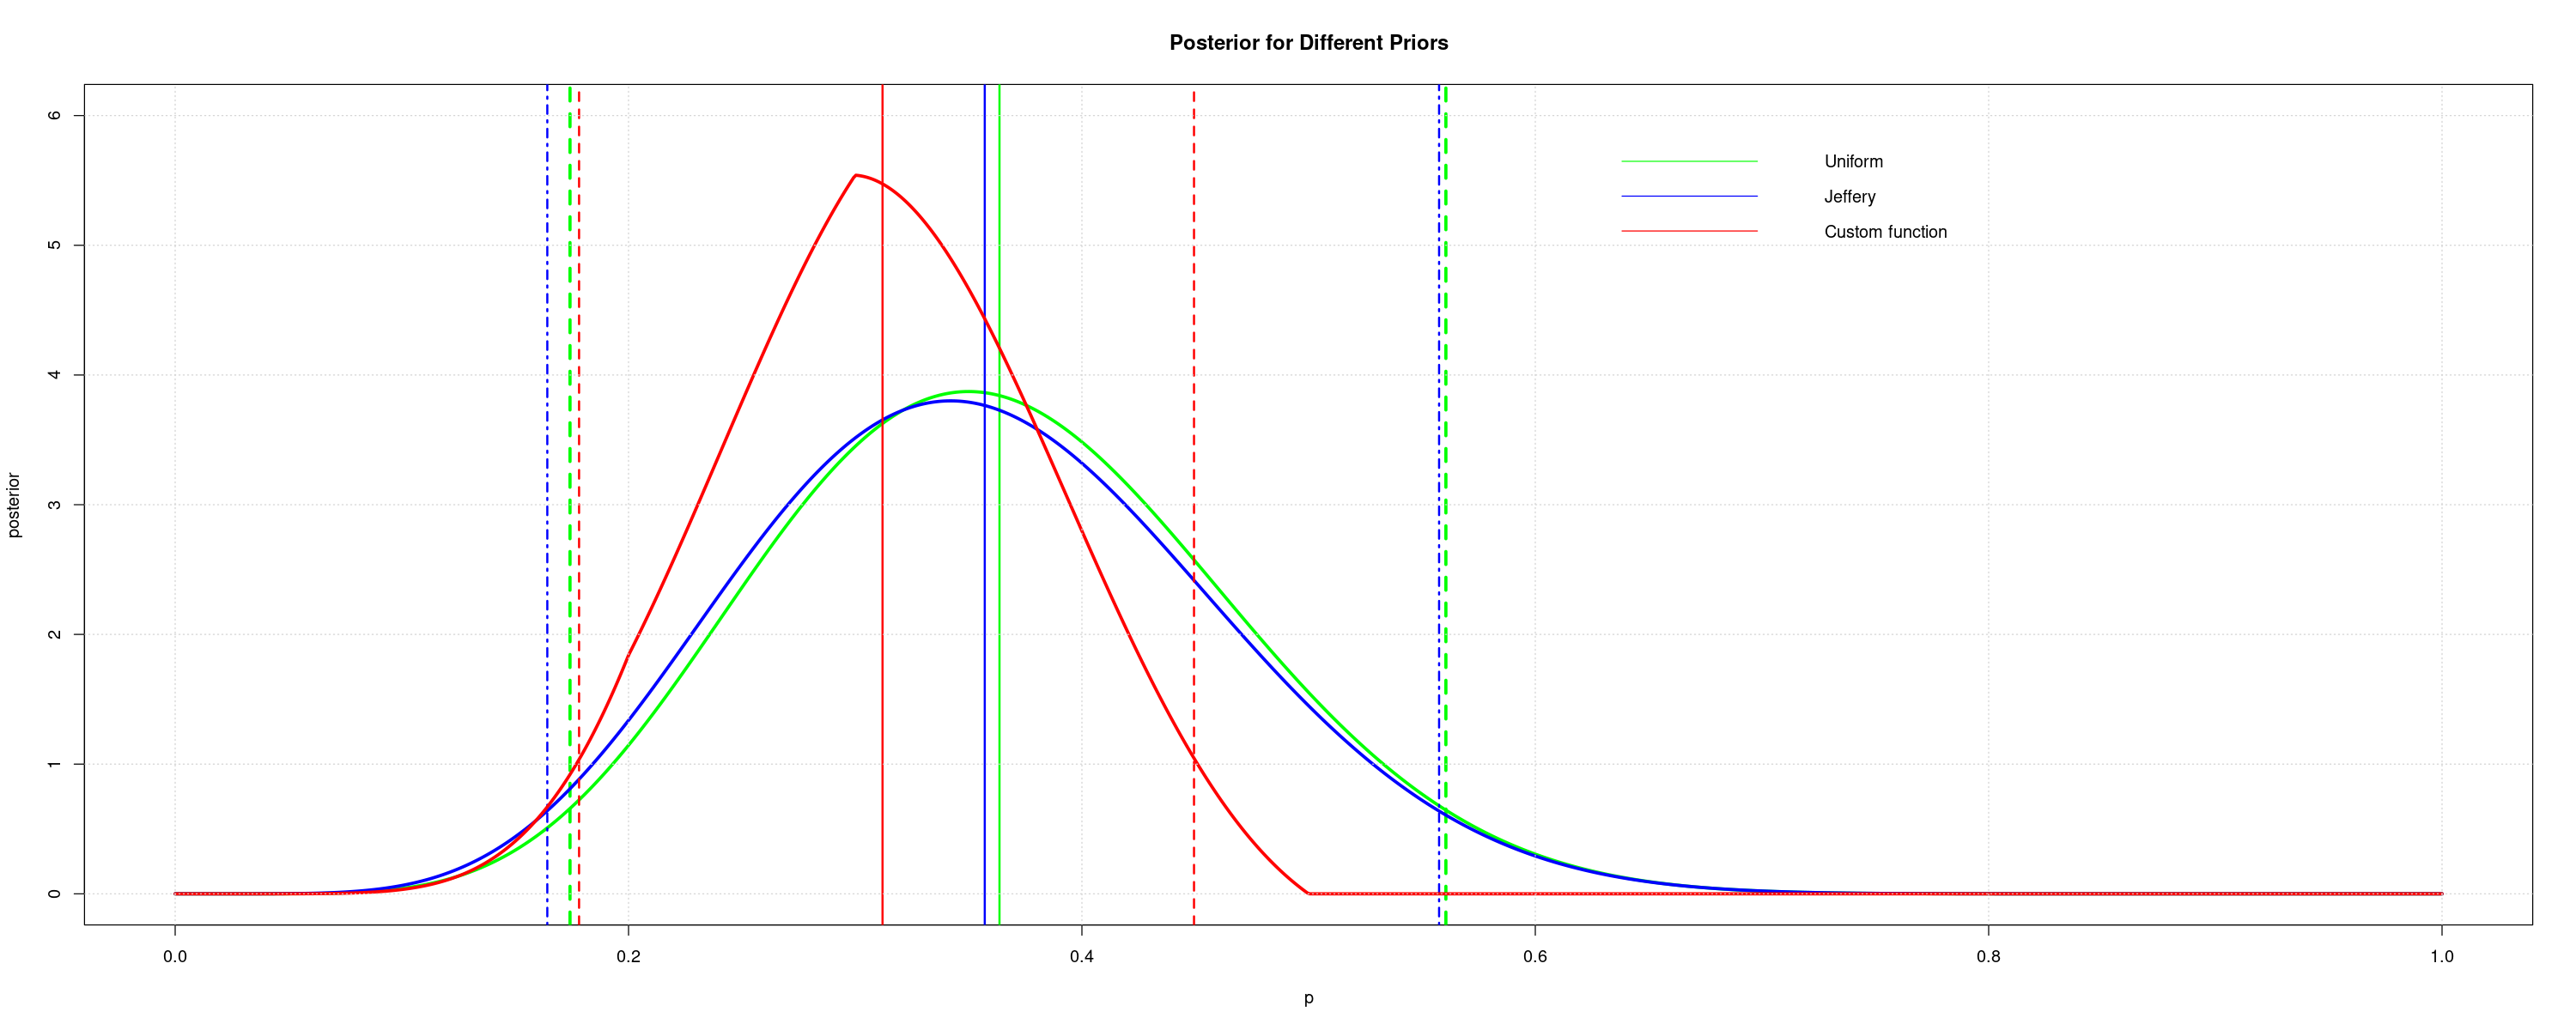

In [458]:
plot(p, p_u, col='green', type='l', lty=1, lwd=3, xlab="p", ylab="posterior", ylim=c(0, 6), main=("Posterior for Different Priors" ))
    #abline(v=second_u, col="green" ,lty=2, lwd=2)
    abline(v=first_u, col="green" ,lty=1, lwd=2)
    abline(v= x_u[['lower']], col="green" ,lty=2, lwd=3)
    abline(v= x_u[['upper']], col="green" ,lty=2, lwd=3)

    lines(p, p_j, col='blue', type='l', lty=1, lwd=3)
    #abline(v=second_j, col="blue" ,lty=2, lwd=2)
    abline(v=first_j, col="blue" ,lty=1, lwd=2)
    abline(v= x_j[['lower']], col="blue" ,lty=4, lwd=2)
    abline(v= x_j[['upper']], col="blue" ,lty=4, lwd=2)


    lines(p, p_s, col='red', type='l', lty=1, lwd=3)
    #abline(v=second_s, col="red" ,lty=2, lwd=2)
    abline(v=first_s, col="red" ,lty=1, lwd=2)
    abline(v= x_s[['lower']], col="red" ,lty=2, lwd=2)
    abline(v=x_s[['upper']], col="red" ,lty=2, lwd=2)
    legend("topright", inset=0.05,legend=c("Uniform", "Jeffery", "Custom function"), col=c("green", "blue", "red"), lty=1:1,box.lty=0)
    grid()

## Exersice 2

Giardia cysts is a parassite that can contaminate food, water, and surfaces, and they can cause giardiasis when swallowed in this infective stage of their life cycle. Infection occurs when a person swallows Giardia cysts from contaminated water, food, hands, surfaces, or objects.

A group of researchers, working for a Human Health Department, work for determining the quality of stream water\
- they take n = 116 samples of one-liter water from sites identified to have a heavy environmental impact from birds and waterflow\
- out of these samples, y = 17 samples contained Giard cystis\
- assuming $\pi$ as the probability that one-liter water sample contains Giardia cystis, find the posterior distribution for π in the two cases: assuming a uniform prior distribution and assuming a Beta (1, 4) prior\
- plot the posterior distribution and summerize the results computing the first two moments\
- find a normal approximation for the posterior $g (\pi ∣ y)$\
- compute a 95% credibility interval both for the original posterior and for the normal approximation, giving the results in a summary table\
- add the limits on the plot of the posterior distributions\


In [449]:
n <- 116
y <- 17
p <- seq(from=0, 1, length.out=1000)
N <- length(p)

#uniform part

uni_p <- dbinom(x=y , size=n , prob= p)  
integ <- sum(uni_p)/N
uni_post <- uni_p/integ             # get uniform posterior with normalization

#compute first and second moment
uni_first <- sum(p*uni_post)/N
uni_second <- sum(p*(uni_post-uni_first)**2)/(n/N)

uni_ci <- ncredint(pvec=p, npost=uni_post,level=0.95,tol=0.01,verbose=FALSE)  #find credibility interval with 95%
uni_low <- uni_ci["lower"]
uni_high <- uni_ci["upper"]


In [450]:
#Beta part
a <- 1 
b <- 4  


beta_p <- dbeta(x=p, a+y,b+n-y)
integ <- sum(beta_p)/N
beta_post <- beta_p/integ       # uniform posterior with normalization

#compute first and second moment
beta_first <- sum(p*beta_post)/N
beta_second <- sum(p*(beta_post-beta_first)**2)/n/N

#find credibility interval with 95%
beta_ci <- ncredint(pvec=p, npost=beta_post,level=0.95,tol=0.01,verbose=FALSE) 
beta_low <- beta_ci["lower"]
beta_high <- beta_ci["upper"]

length(beta_p)


[1] 1000

In [451]:
#summarize in the plot

df <- data.frame(
    Prior=c("Uniform", "Beta"),
    Posterior=c("Uniform", "Beta"),
    First_moment= c(uni_first, beta_first),
    second_moment=c(uni_second, beta_second),
    CI_low=c(uni_low, beta_low),
    CI_high=c(uni_high, beta_high)
)
df

Prior,Posterior,First_moment,second_moment,CI_low,CI_high
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Uniform,Uniform,0.1525424,1.084675e+04,0.09109109,0.2172172
Beta,Beta,0.1487603,1.083636e-02,0.08908909,0.2122122


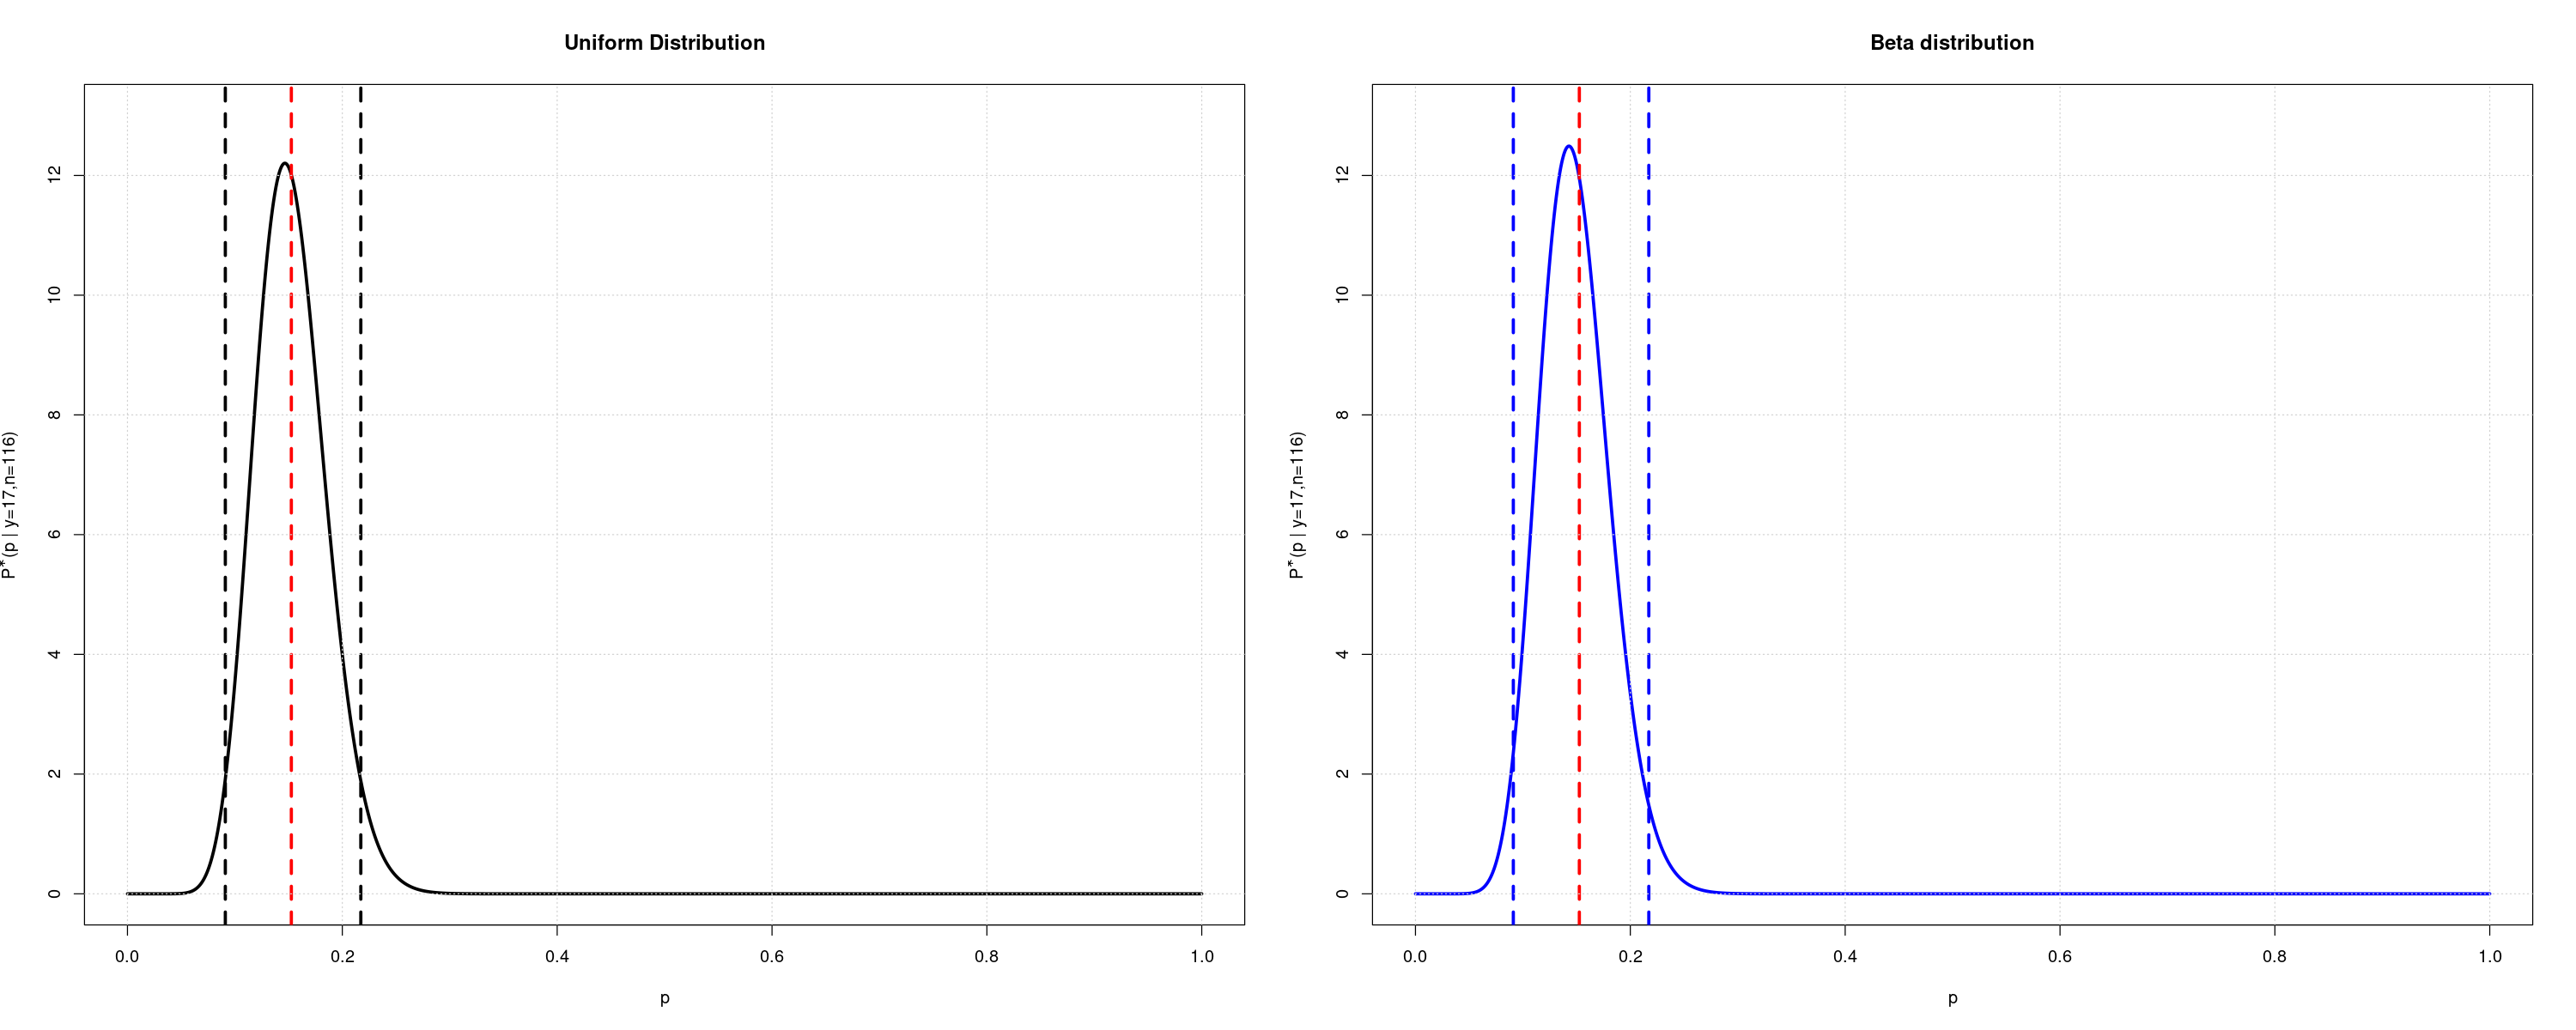

In [452]:
#plotting 
par(mfrow=c(1,2))
options(repr.plot.width=25, repr.plot.height=10)

plot(p, uni_post, col='black', type='l', lty=1, lwd=3, xlab="p", ylab= expression (paste(P^symbol("*"), "(p | y=17,n=116)")),ylim=c(0, 13),
    main = "Uniform Distribution")
    abline(v=uni_first,col="red", lty=2, lwd=3)
    abline(v= uni_low, col="black", lty=2, lwd=3)
    abline(v= uni_high, col="black", lty=2, lwd=3)
    grid()


plot(p, beta_post, col='blue', type='l', lty=1, lwd=3, xlab="p", ylab= expression (paste(P^symbol("*"), "(p | y=17,n=116)")),ylim=c(0, 13),
    main= "Beta distribution")
    abline(v=uni_first,col="red", lty=2, lwd=3)
    abline(v= uni_low, col="blue", lty=2, lwd=3)
    abline(v= uni_high, col="blue", lty=2, lwd=3)
    grid()


For a bernoulli process with uniform prior, the mean of the gaussiann is the mean of the distribution, and the standard deviation is given by the reliability, which can evaluated with the expression:

$$

    \sigma = \frac{1}{n}\sqrt{\frac{y(n-y)}{n}}
$$

Also, for a beta posterior, the mean of the gaussiann is the mean of the distribution and the standard deviation is given by:

$$
    \sigma = \frac{1}{\alpha+\beta+n-2}\sqrt{\frac{\alpha+y-1}{\alpha+y}}
$$\

where $n$ is the number of tosses and $r$ the number of positive outcomes. In addition, $\alpha$ and $\beta$ are the parameters of the beta distribution
I found this on the internet for :(unfortunately the previous formula did not workable)
$$
var =\frac {\alpha \beta}{(\alpha + \beta)^2 (\alpha + \beta +1)}
$$
Also we know that:
$$var  = \sigma^2$$

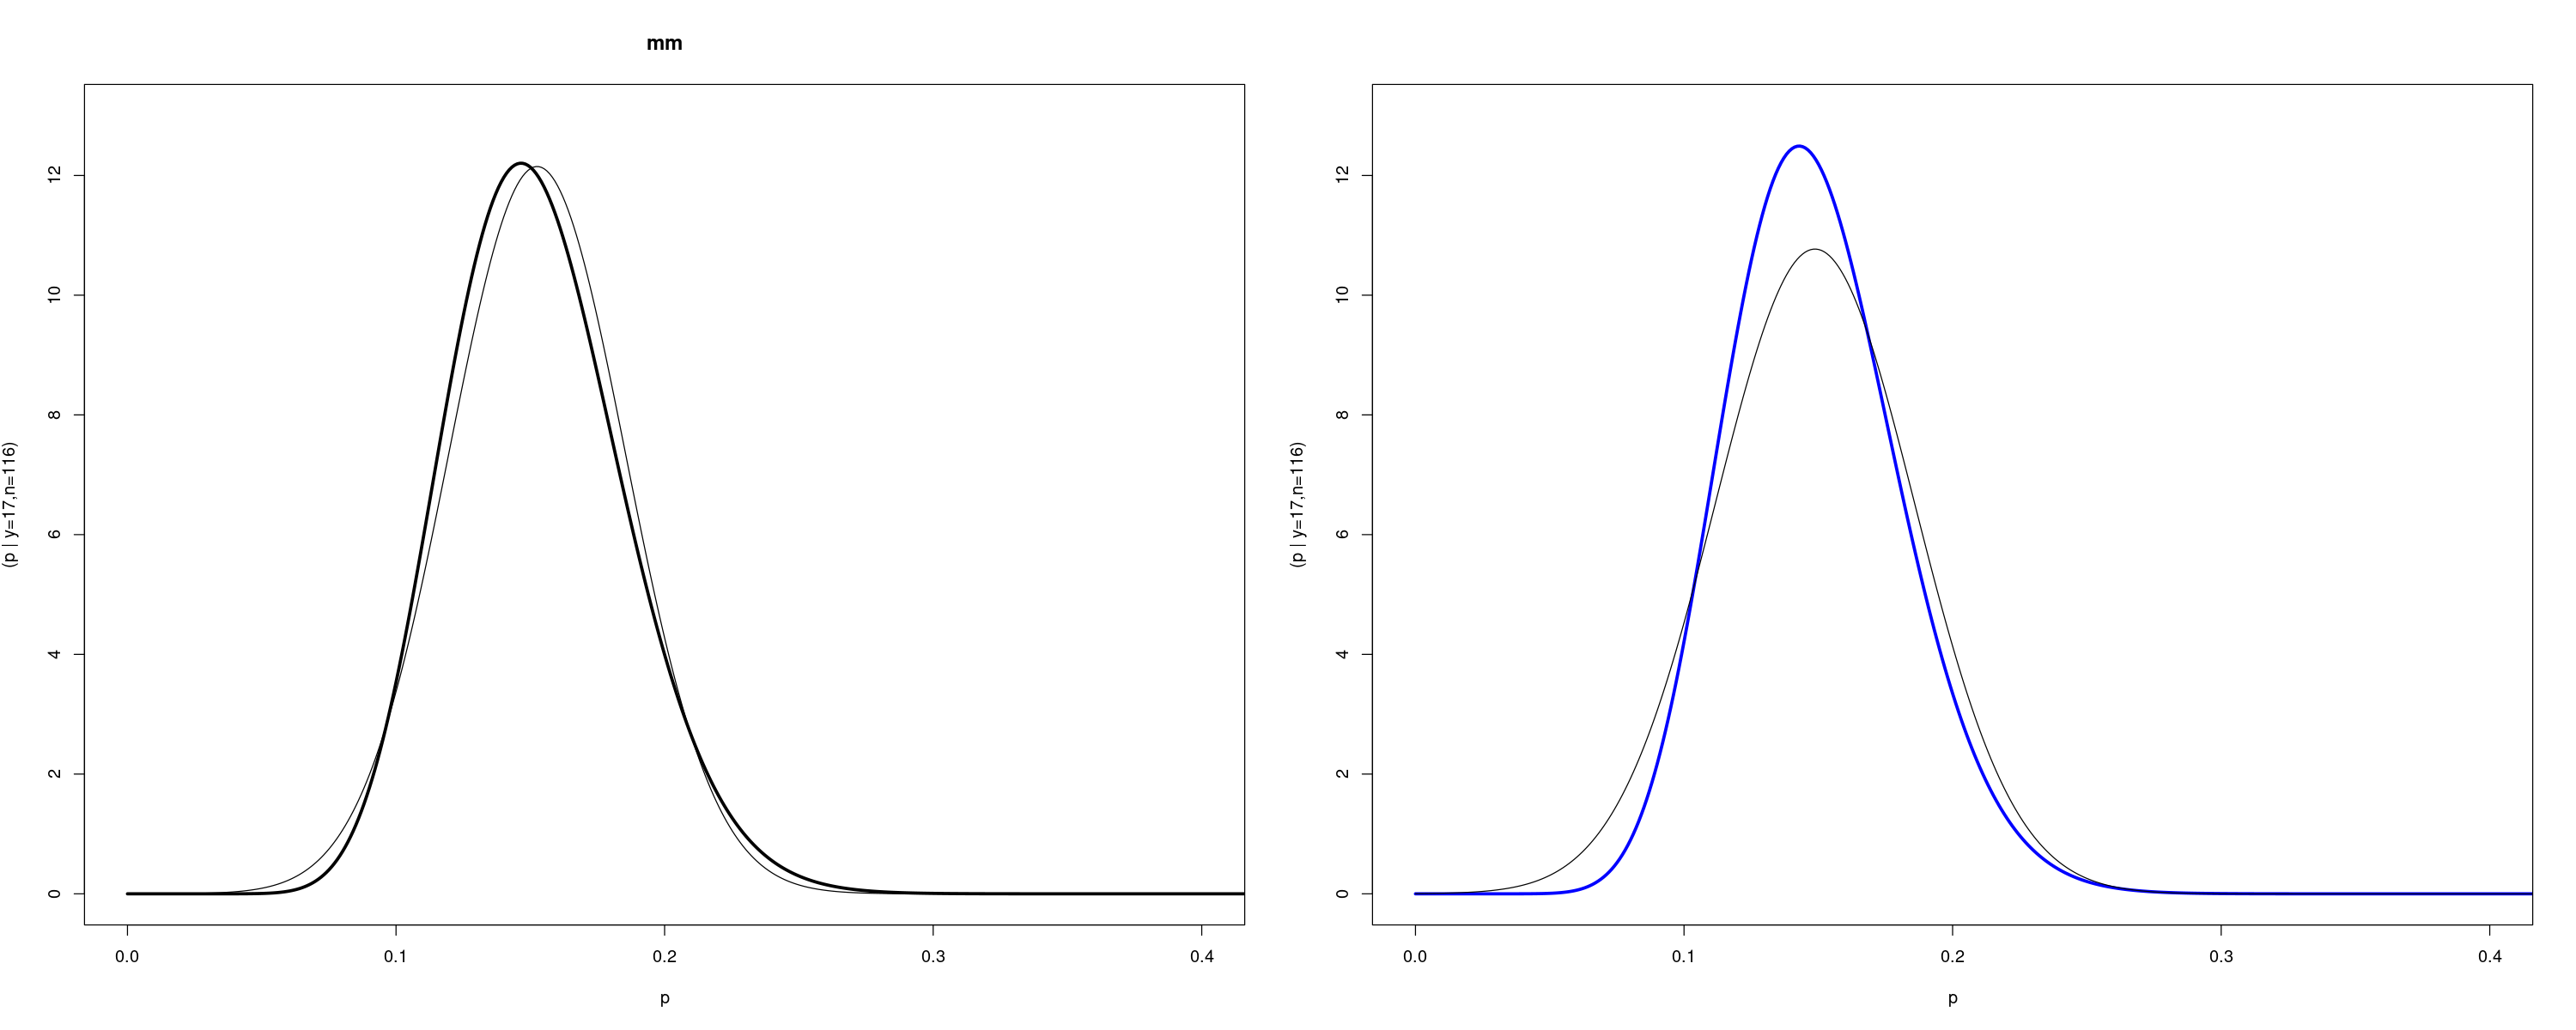

In [453]:
par(mfrow=c(1,2))
#get normal approximate for uniform and beta distribution(gaussian)

uni_var <- (sqrt(y*(n-y)/n))/n
uni_gauss <- dnorm(p, mean=uni_first, sd=uni_var)

plot(p, uni_post, type='l', lty=1, lwd=3, xlab="p", ylab= expression (paste("(p | y=17,n=116)")),, xlim=c(0, 0.4),ylim=c(0, 13),  main=("Uniform"))
lines(p, uni_gauss)

alpha <- a+y
beta <- b+n-y
#the sd formula as it mentioned above but it did not work well
#beta_var <- (sqrt((alpha+y-1) / (alpha+y)))/(alpha+beta+n-2) 

#I found these two on the internet and they work well
beta_var <- sqrt(1/(1/(y+a-1) - 1/(b+n+y-1)))/(a+b+n-2)     
#beta_var <- sqrt(alpha*beta/(((alpha+beta)**2)*(alpha + beta +1)))

beta_gauss <- dnorm(p, mean=beta_first, sd=beta_var)
plot(p, beta_post, col='blue', type='l', lty=1, lwd=3, xlab="p", ylab= expression (paste( "(p | y=17,n=116)")), xlim=c(0, 0.4),ylim=c(0, 13), main=("Beta"))
lines(p, beta_gauss)

## Exersice 3

#### A coin is flipped n = 30 times with the following outcomes:
##### $$T, T, T, T, T, H, T, T, H, H, T, T, H, H, H, T, H, T, H, T, H, H, T, H, T, H, T, H, H, H$$

#### a) Assuming a flat prior, and a beta prior, plot the likelihood, prior and posterior distributions for the data set.

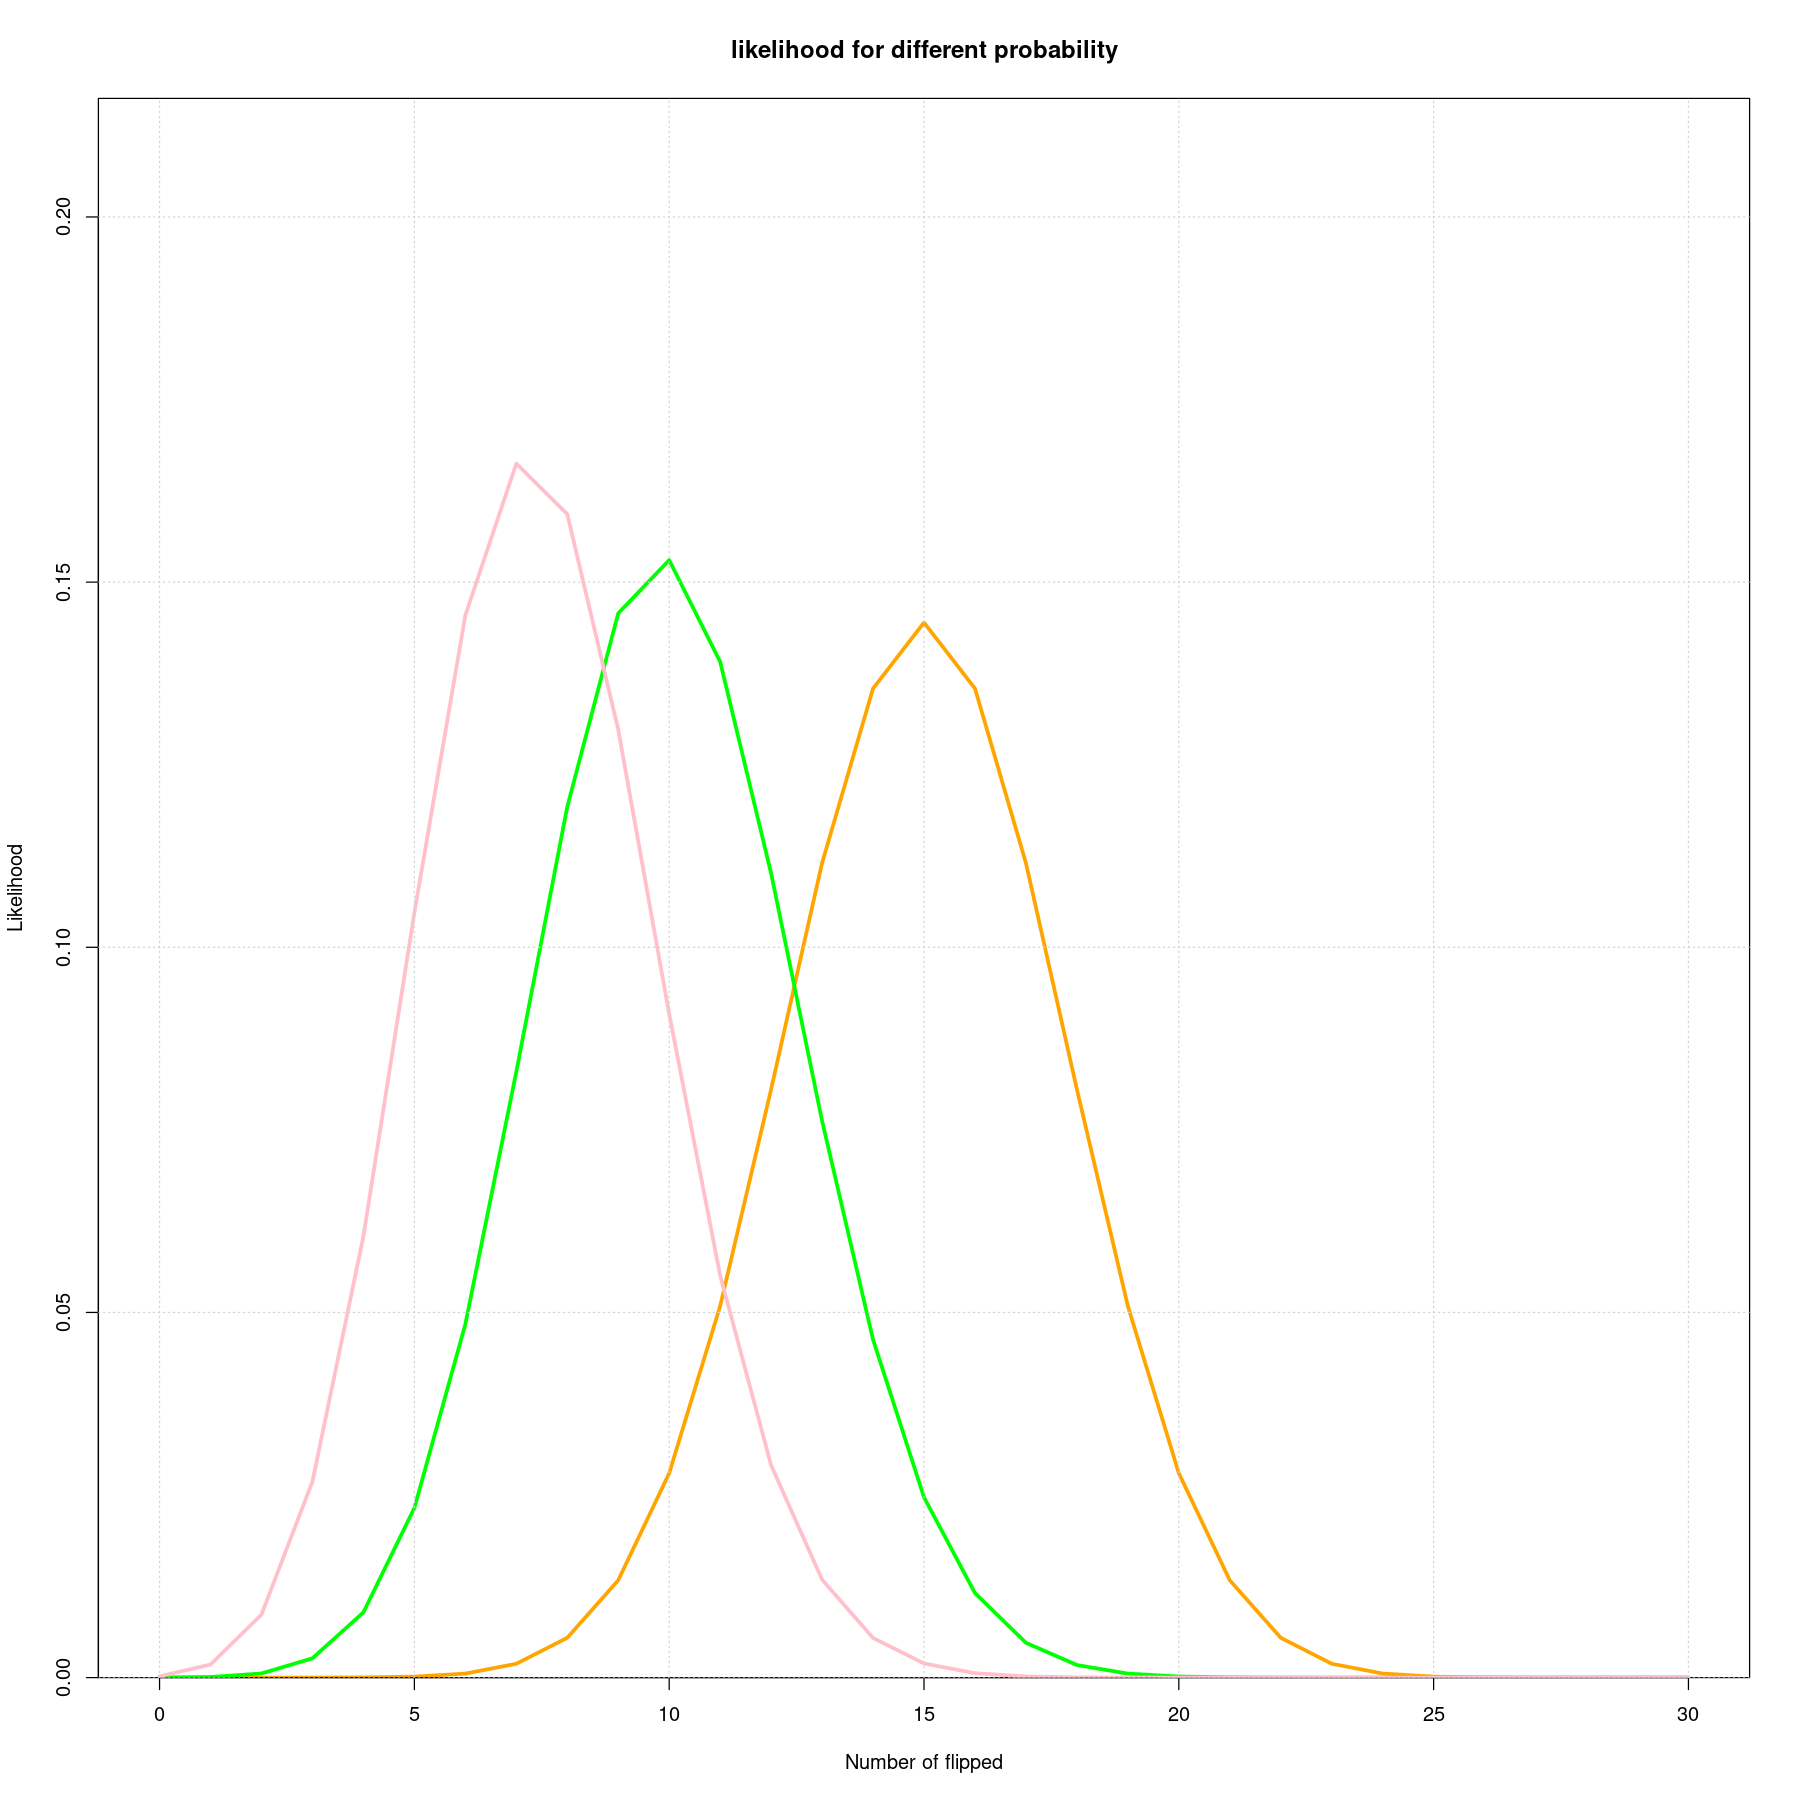

In [484]:

out <- c('T', 'T', 'T', 'T', 'T', 'H', 'T', 'T', 'H', 'H', 'T', 'T', 'H', 'H', 'H', 'T', 'H', 'T', 'H', 'T', 'H', 'H', 'T', 'H', 'T', 'H', 'T', 'H', 'H', 'H')
n <- length(out)
r <- length(out[out == "H"]) 
x <- seq(0, n, by=1)
# measure likelihood for different probability
like1 <- dbinom(x=x, size=n, prob=1)
like2 <- dbinom(x=x, size=n, prob=1/2)
like3 <- dbinom(x=x, size=n, prob=1/3)
like4 <- dbinom(x=x, size=n, prob=1/4)


plot(x, like2 , xaxs="r", yaxs="i", col="orange", type='l', ylim=c(0,max(like4)+0.05),
    main=paste("likelihood for different probability"), lty=1, lwd= 3, xlab = "Number of flipped" , ylab="Likelihood")
    lines(x, like3, col='green',type='l', lty= 1, lwd=3)
    lines(x, like4, col='pink',type='l', lty= 1, lwd=3)
    grid()

options(repr.plot.width=15, repr.plot.height=5)

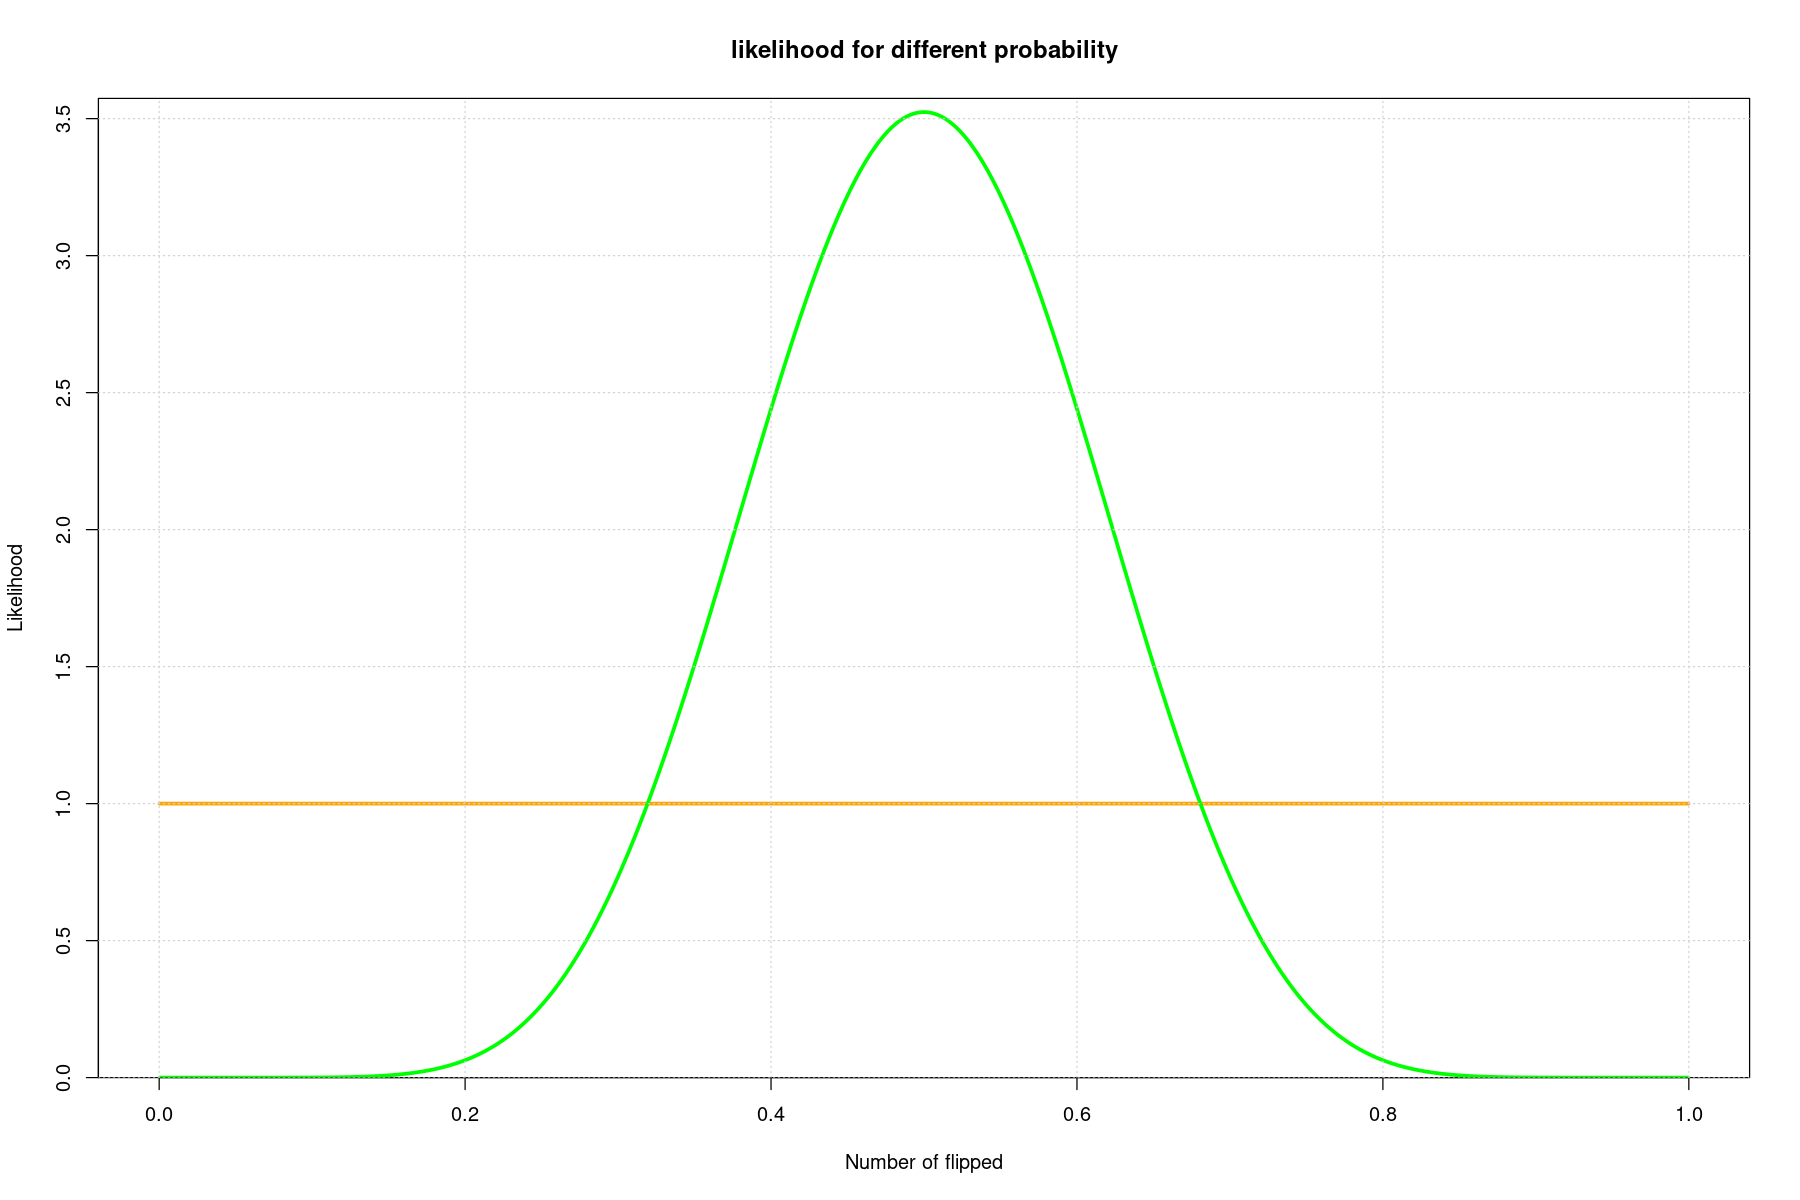

In [487]:
#measuring prior for flat and beta distribution
alpha <- 10
beta <- 10
sample <- 2000
delta <- 1/sample
p <- seq(1/(2*sample), by=delta, length.out=sample)

flat_prior <- dunif(x=p)
beta_prior <- dbeta(x=p, alpha, beta)

plot(p, flat_prior , xaxs="r", yaxs="i", col="orange", type='l', ylim=c(0,max(beta_prior)+0.05),
    main=paste("likelihood for different probability"), lty=1, lwd= 3, xlab = "Number of flipped" , ylab="Likelihood")
    lines(p, beta_prior, col='green',type='l', lty= 1, lwd=3)
    grid()
options(repr.plot.width=15, repr.plot.height=15)


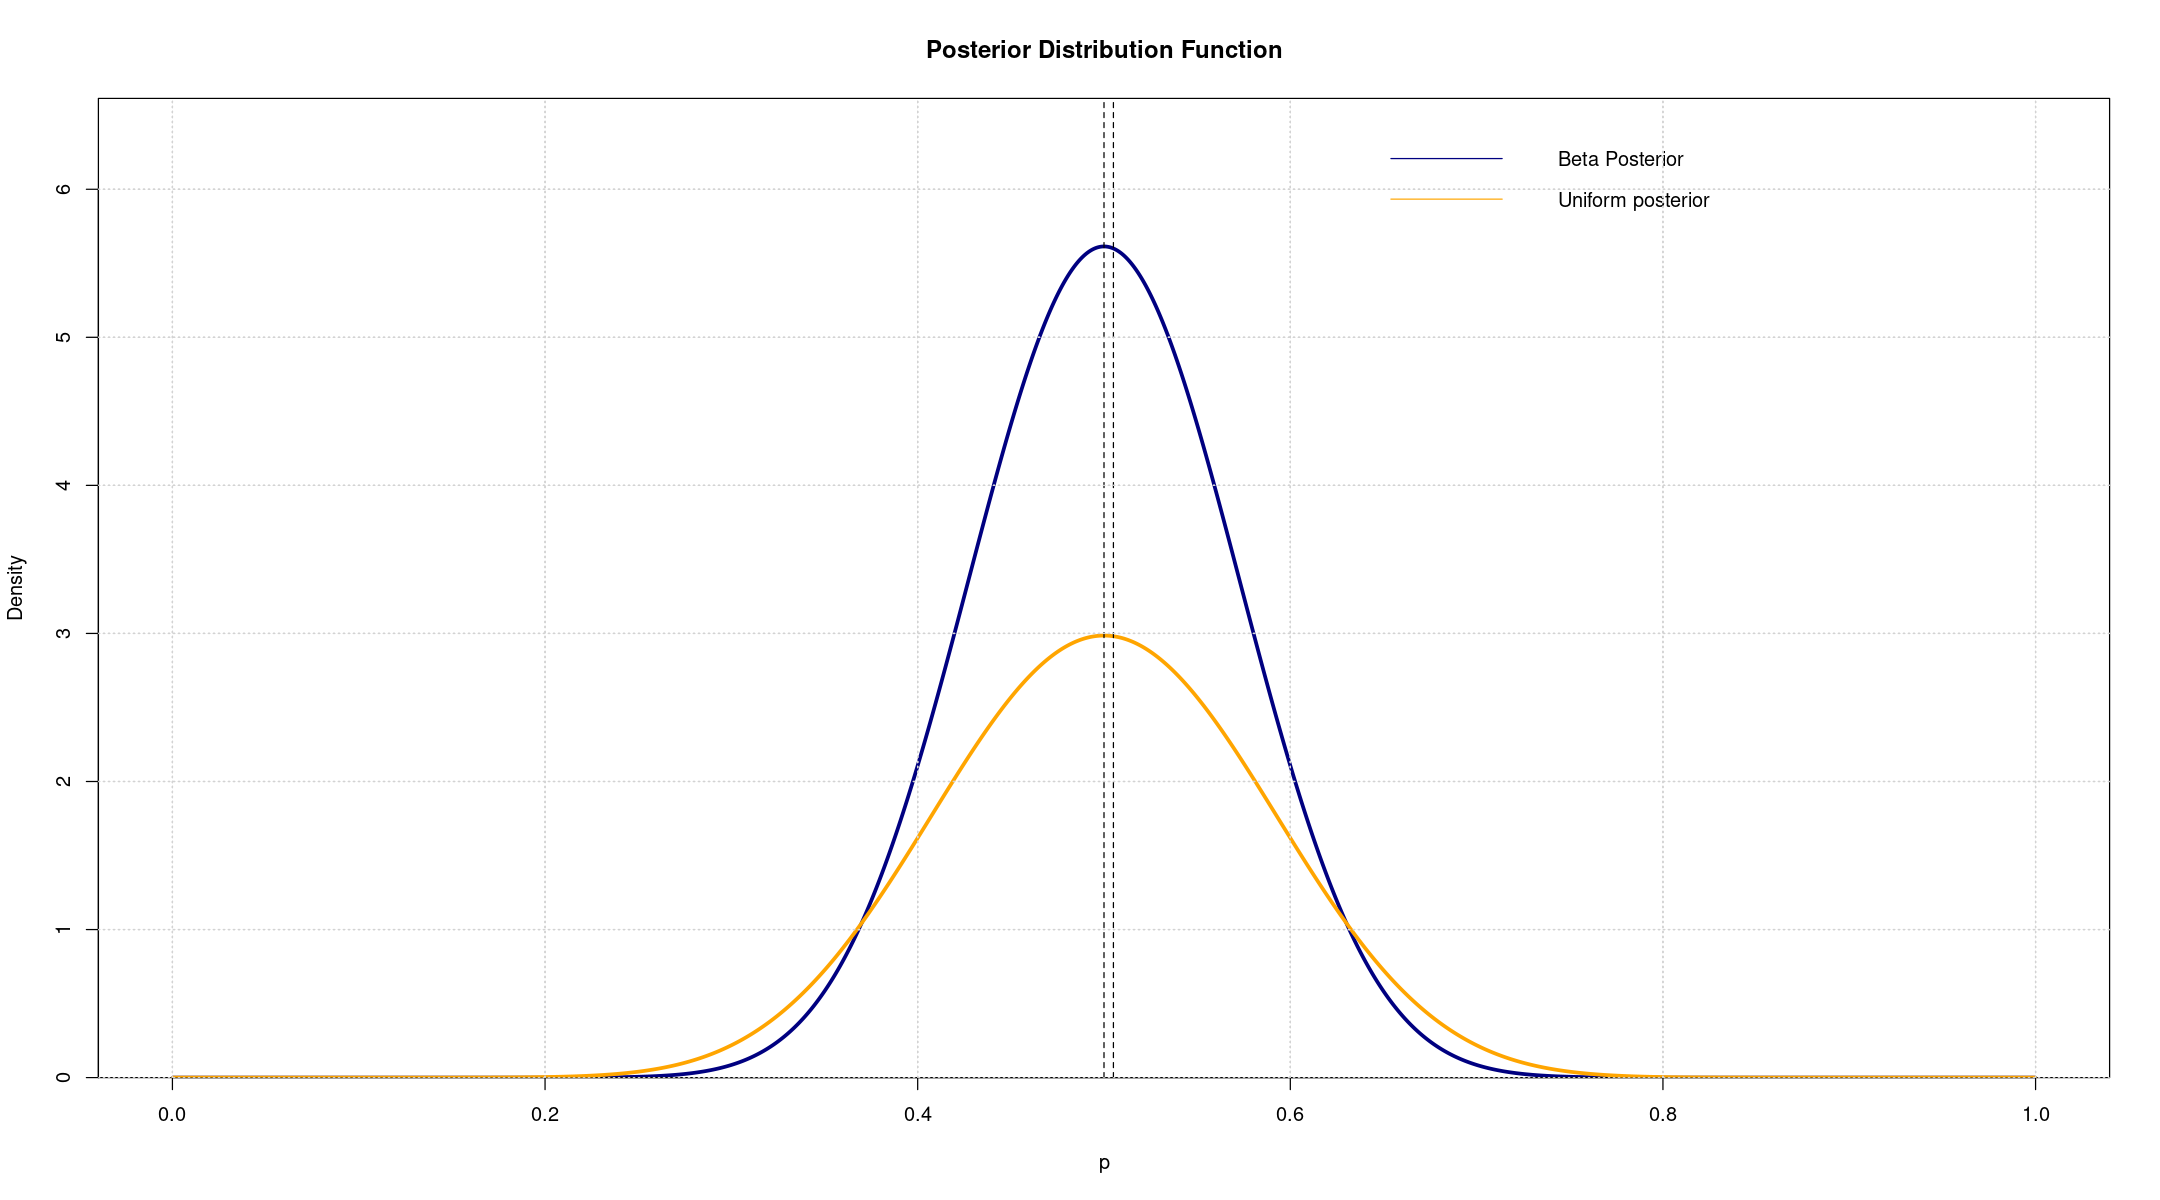

In [55]:
#measure posterior for flat prior and beta prior
sample <- 2000
p2 <- seq(from=1/(2*sample), by=1/sample, length.out=sample)
p_s <- dbinom(x=r, size=n, prob=p2)*flat_prior
flat_post <- p_s/(delta*sum(p_s)) #normalize posterior
beta_post <- dbeta(x=p2, alpha+r , beta+n-r)


plot(p2, beta_post , xaxs='r', yaxs='i', col='navy', type='l', ylim=c(0,max(beta_post)+1),
     main = "Posterior Distribution Function", lty=1, lwd = 3, xlab="p", 
     ylab='Density')

lines(p2, flat_post$flat,col="orange", type='l', lty=1 ,lwd=3)
legend("topright", inset=0.02,legend=c("Beta Posterior", "Uniform posterior"), col=c("navy", "orange"), lty=1:1,box.lty=0)
grid()

f.mean <- delta*sum(p2*flat_post)
abline(v=f.mean, lty=2,col='black')
grid()

b.mean <- delta*sum(p2*beta_post)
abline(v=b.mean, lty=2,col='black')
grid()



#### b) Evaluate the most probable value for the coin probability p and, integrating the posterior probability distribution, give an estimate for a 95% credibility interval.

In [56]:
max.flat  <- p2[which.max(flat_post$flat)]
max.beta <- p2[which.max(beta_post)]

cat("The most probable value of the Posterior for Flat Prior is:", max.flat,'\n')
cat("The most probable value of the Posterior for Beta Prior is:", max.beta)

The most probable value of the Posterior for Flat Prior is: 0.49975 
The most probable value of the Posterior for Beta Prior is: 0.49975

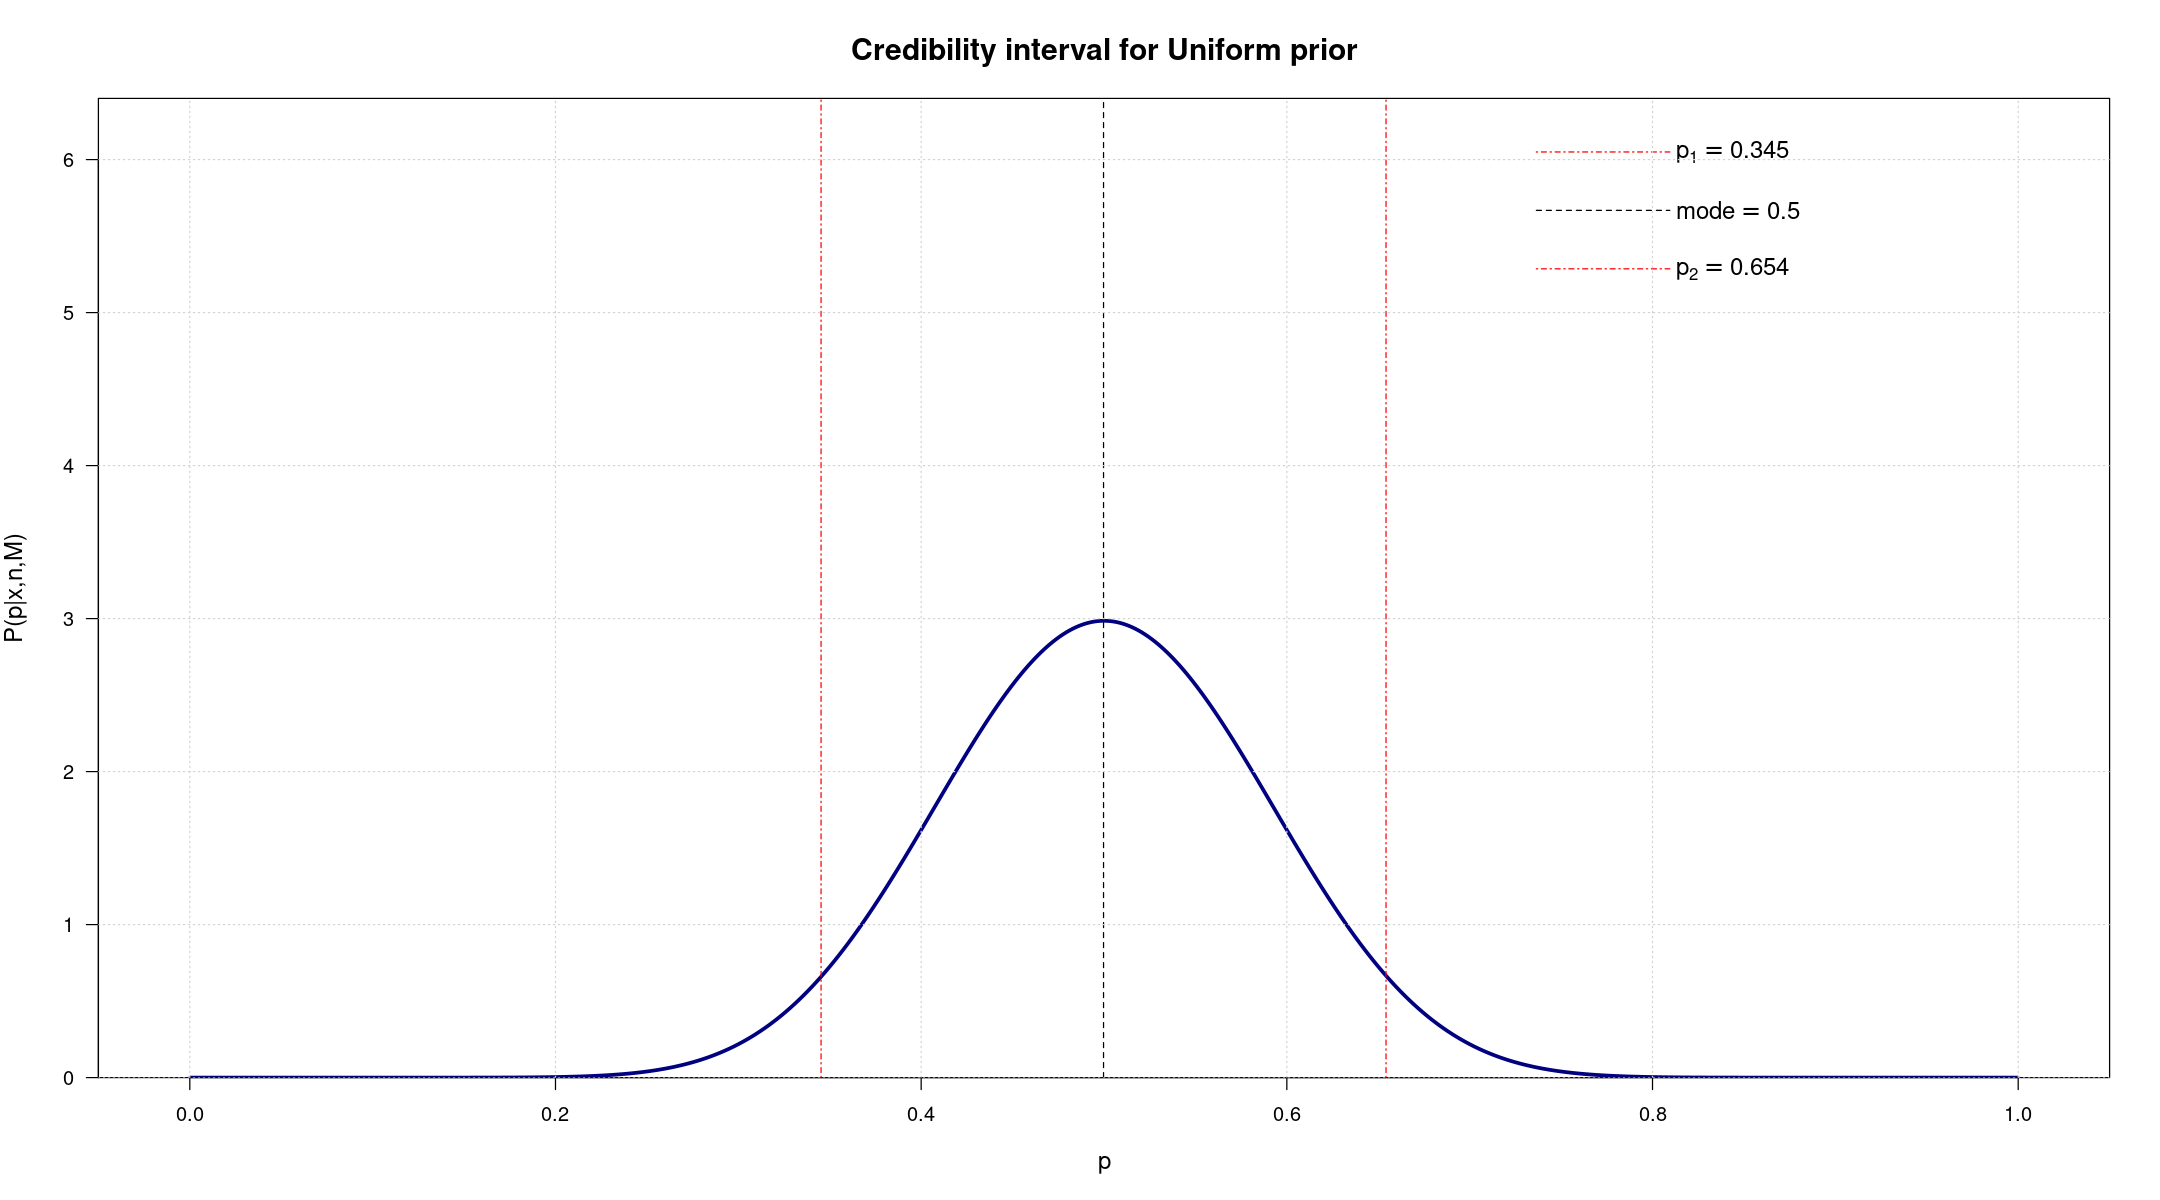

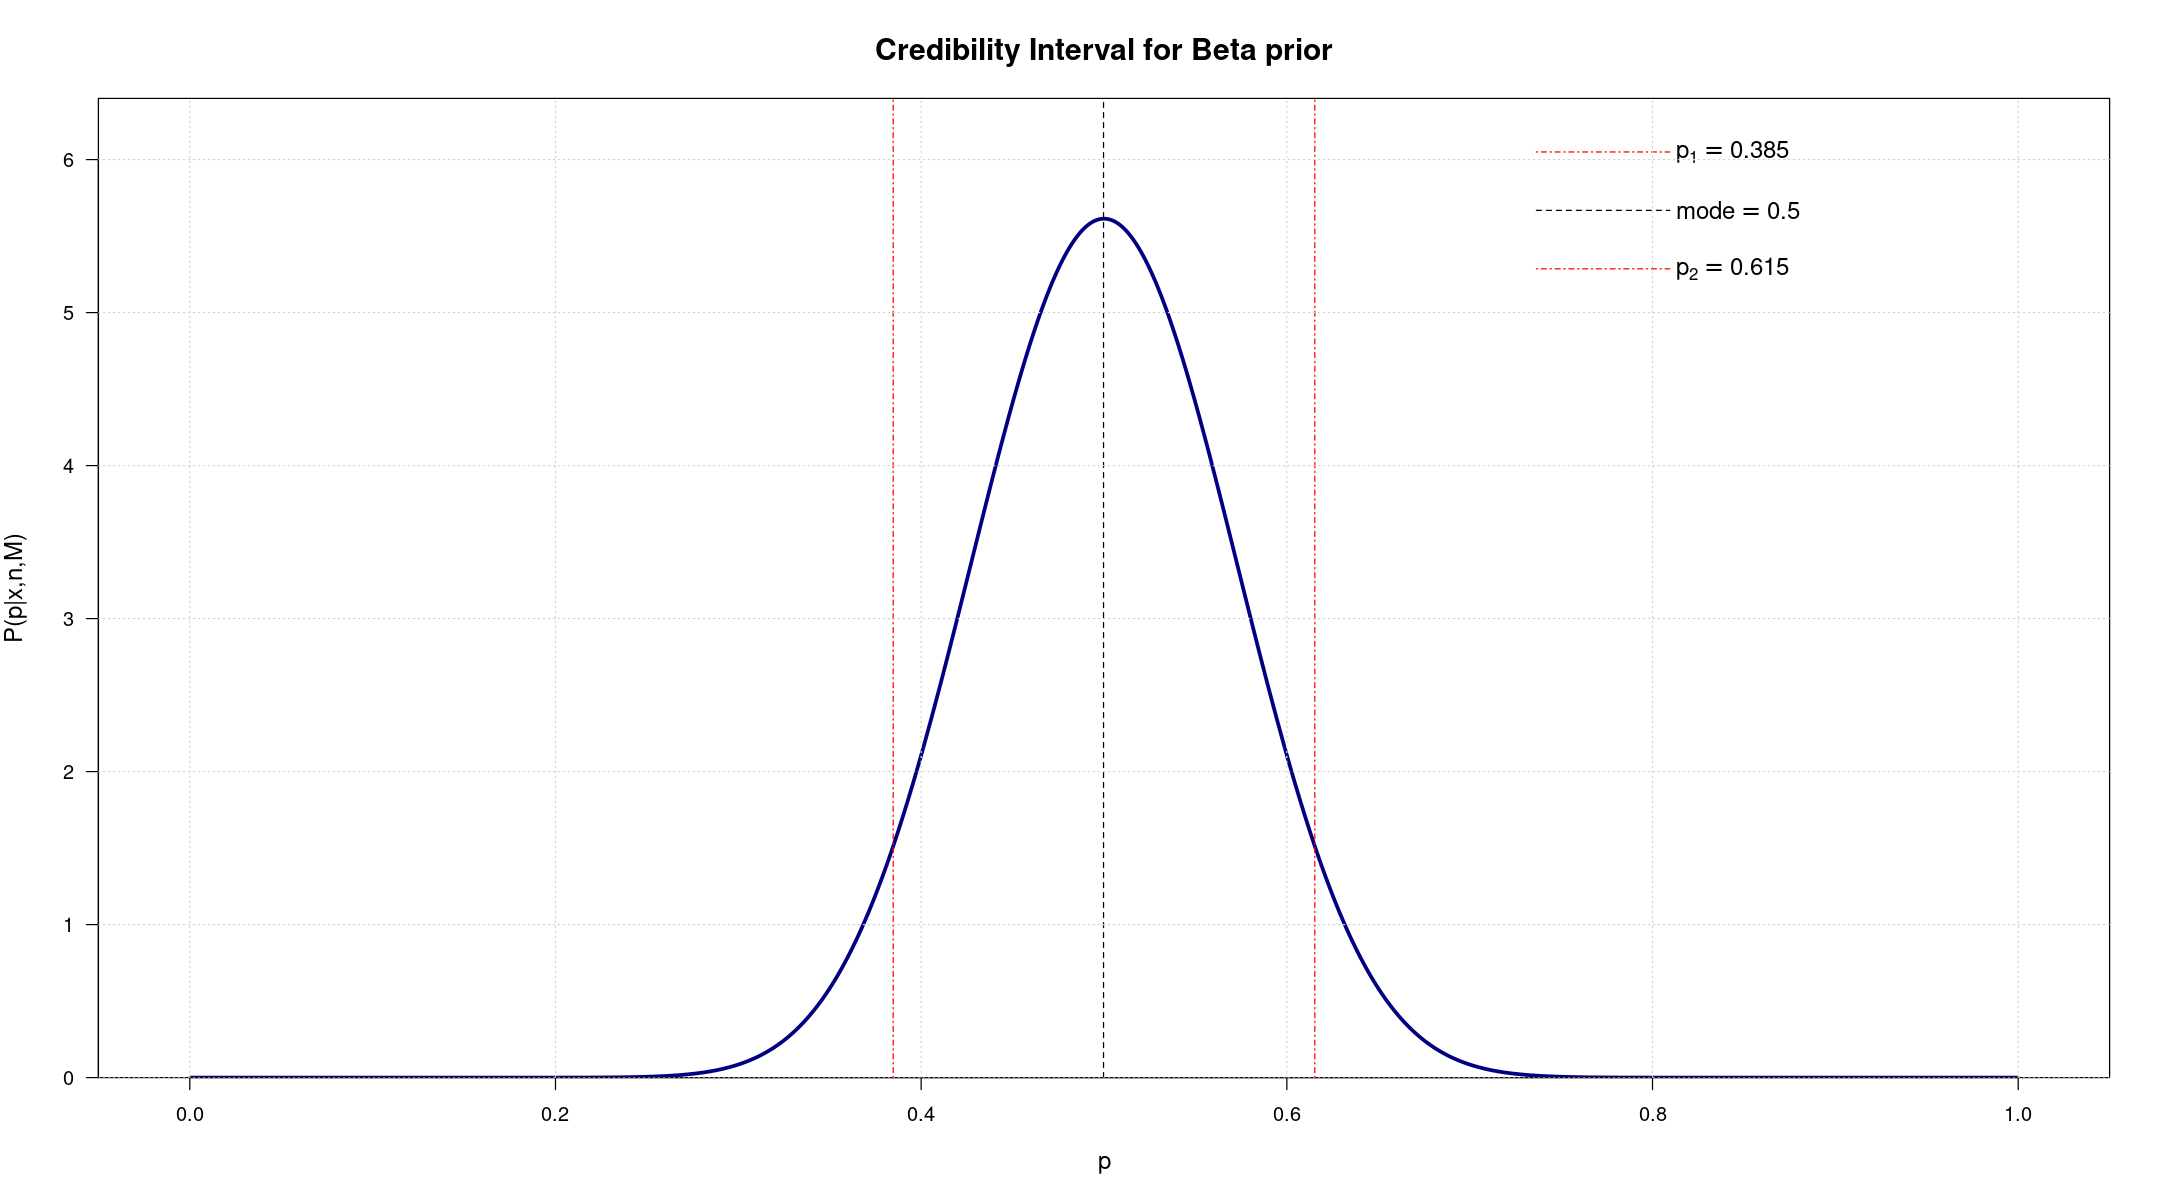

In [57]:
sample <- 2000
delta <- 1/sample
p <- seq(from=delta/2, by=delta, length.out=sample)
cl = 0.95 # Credibility interval

flat_area <- delta*cumsum(flat_post)
p1_flat <- p[flat_area$flat >= (1-cl)/2][1]
p2_flat <- (max.flat -p1_flat )+max.flat


beta_area <- delta*cumsum(beta_post)
p1_beta <- qbeta(1 - cl, alpha+r, beta+n-r)
p2_beta <- qbeta(cl, alpha+r, beta+n-r)



plot(p, flat_post$flat, xaxs='i', yaxs='i', type='l', lwd = 3, col = 'navy', main="Credibility interval for Uniform prior", cex.main=1.5,
 xlim=c(-0.05,1.05), ylim=c(0,6.4), xlab="p", ylab="P(p|x,n,M)", cex.lab=1.2, las=1)
abline(v=max.flat, col='black', lty=2)
abline(v=p1_flat, col='red', lty=4)
abline(v=p2_flat, col='red', lty=4)
legend(0.70, 6.4, col=c("red", "black", "red"), lty=c(4, 2, 4), bty='n', cex=1.2, x.intersp=0.1, y.intersp=1.2, legend = c(parse(text = paste0('p[1] == ', round(p1_flat, 3))), 
parse(text = paste0('mode == ', round(max.flat, 3))), parse(text = paste0('p[2] == ', round(p2_flat, 3)))))
grid()

plot(p, beta_post, xaxs='i', yaxs='i', type='l', lwd = 3, col = 'navy', main="Credibility Interval for Beta prior", cex.main=1.5,
 xlim=c(-0.05,1.05), ylim=c(0,6.4), xlab="p", ylab="P(p|x,n,M)", cex.lab=1.2, las=1)
abline(v=max.beta, col='black', lty=2)
abline(v=p1_beta, col='red', lty=4)
abline(v=p2_beta, col='red', lty=4)
legend(0.70, 6.4, col=c("red", "black", "red"), lty=c(4, 2, 4), bty='n', cex=1.2, x.intersp=0.1, y.intersp=1.2, legend = c(parse(text = paste0('p[1] == ', round(p1_beta, 3))),
 parse(text = paste0('mode == ', round(max.beta, 3))), parse(text = paste0('p[2] == ', round(p2_beta, 3)))))
grid()


#### c) Repeat the same analysis assuming a sequential analysis of the data 1 . Show how the most probable value and the credibility interval change as a function of the number of coin tosses

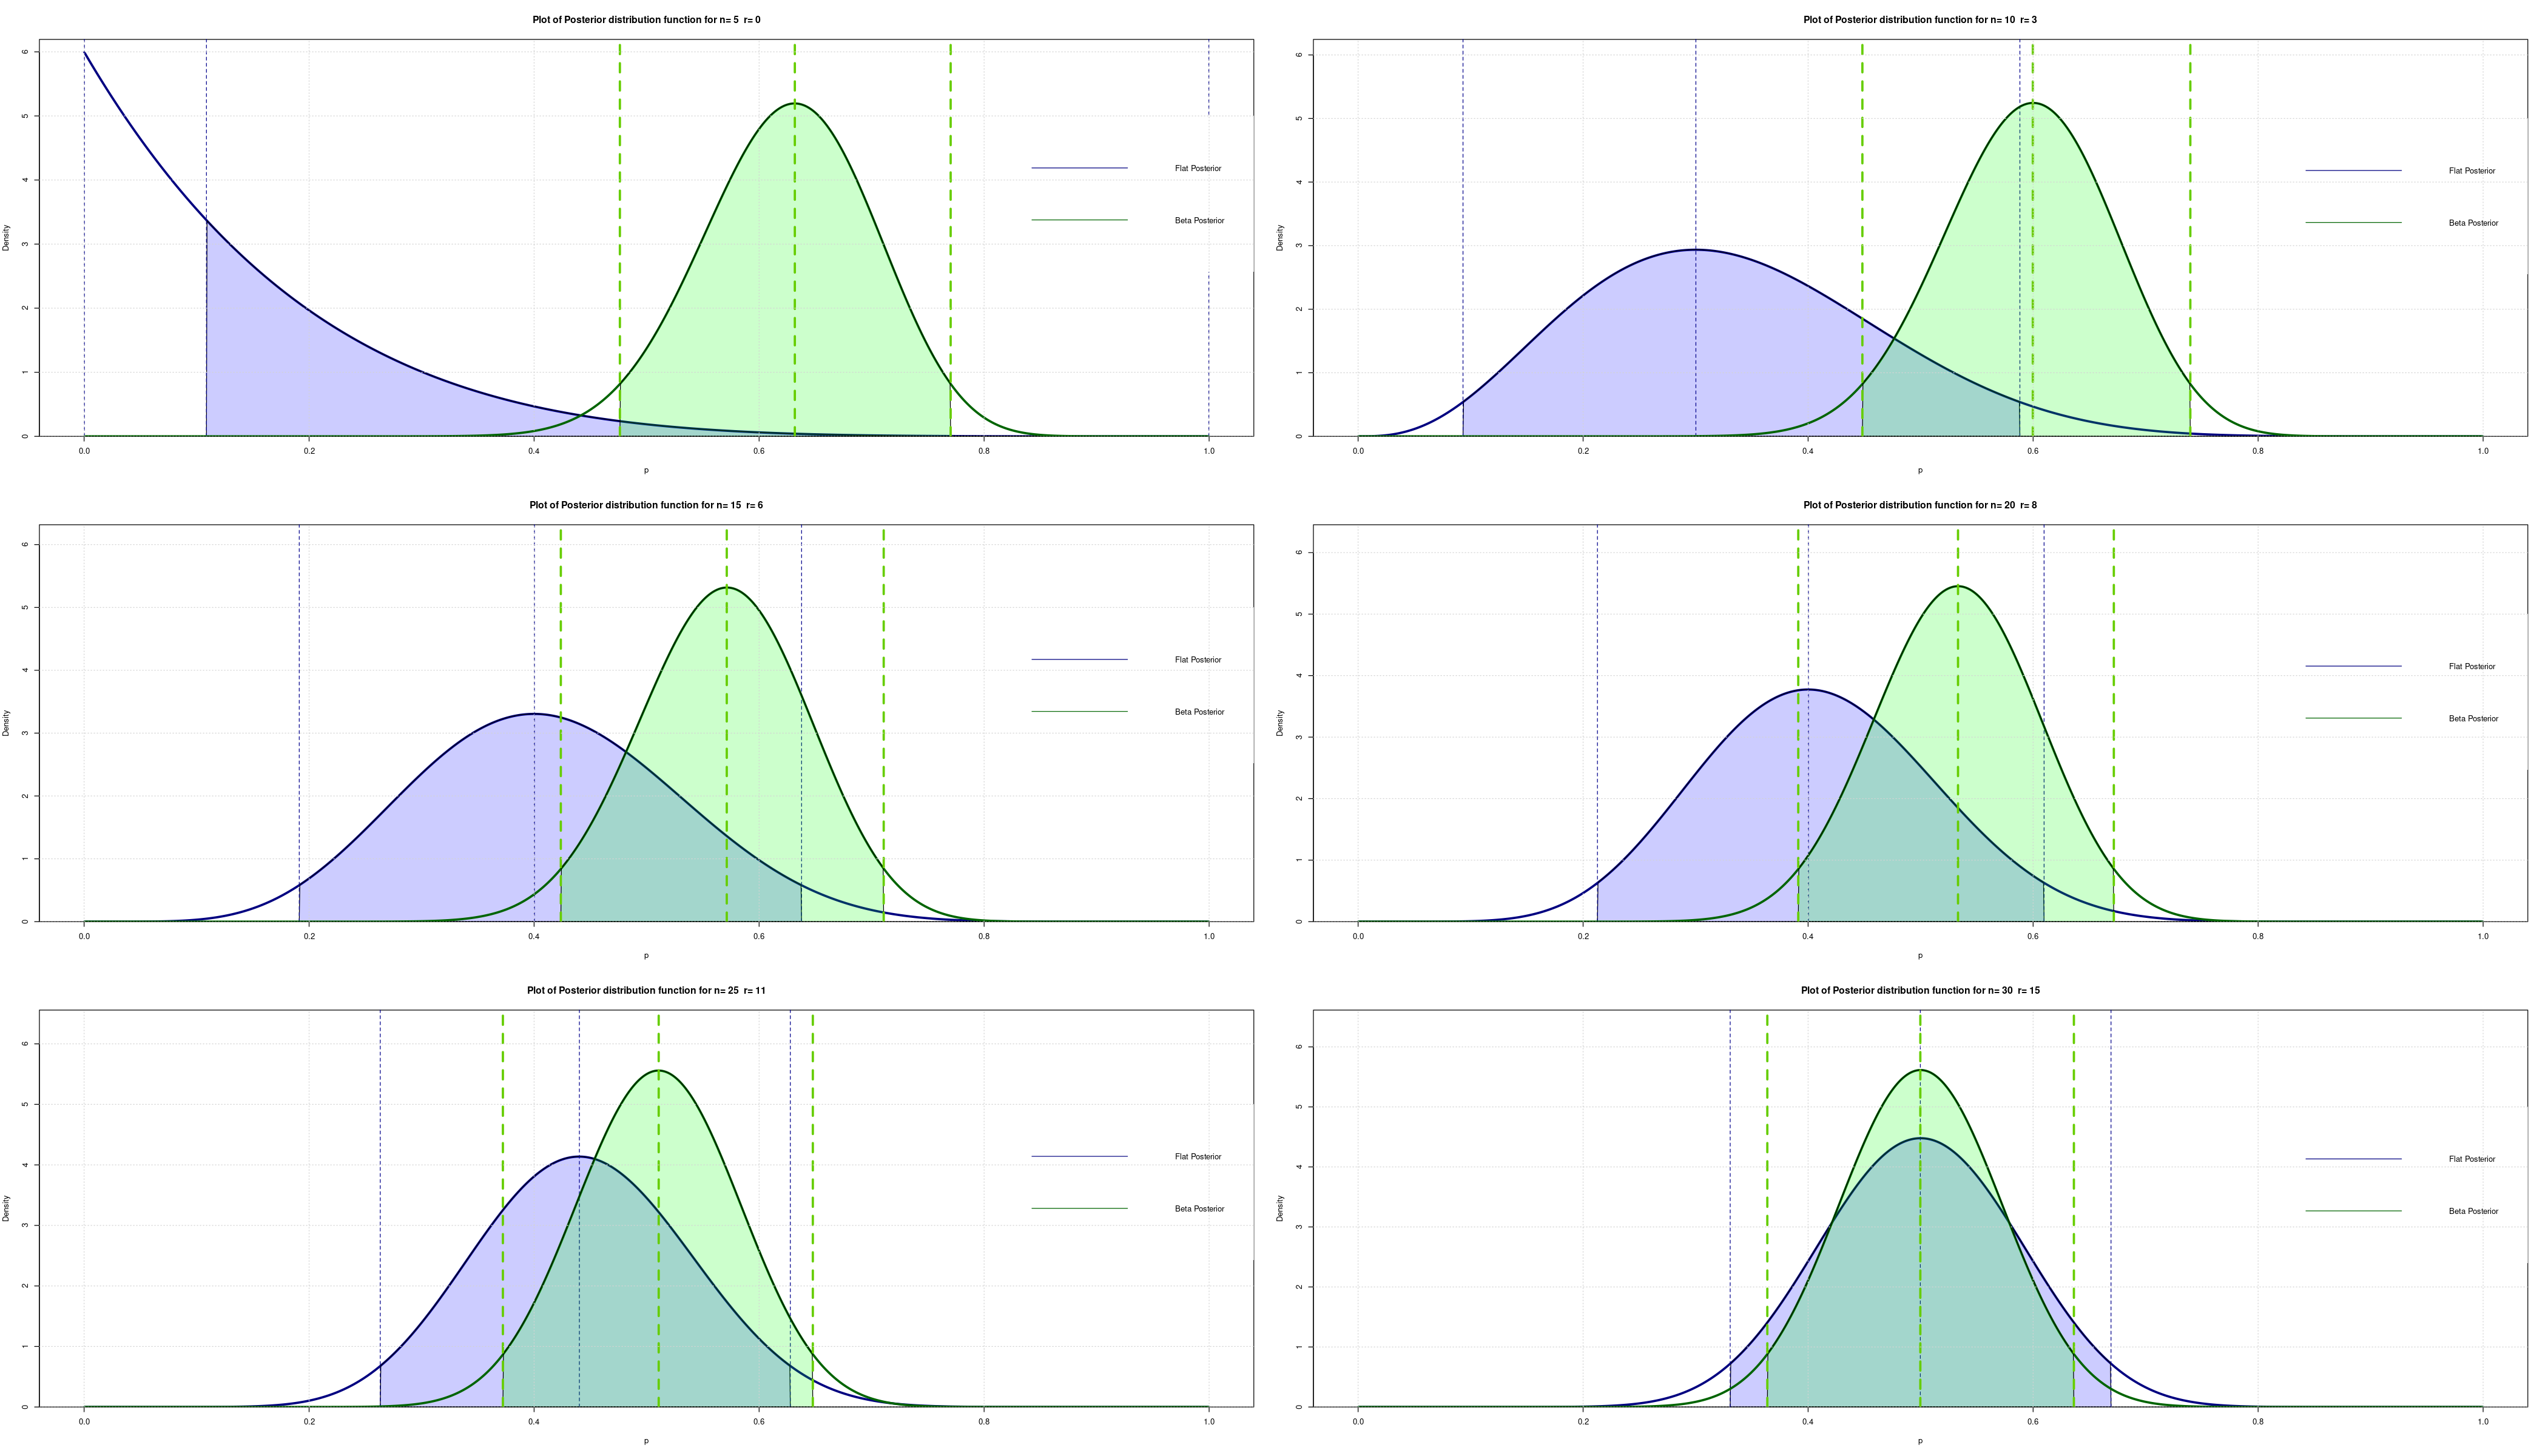

In [460]:
par(mfrow=c(3,2))
options(repr.plot.width=35, repr.plot.height=20)

# Vector of outcomes
out <- c('T', 'T', 'T', 'T', 'T', 'H', 'T', 'T', 'H', 'H', 'T', 'T', 'H', 'H', 
              'H', 'T', 'H', 'T', 'H', 'T', 'H', 'H', 'T', 'H', 'T', 'H', 'T', 'H', 'H', 'H')

n <- length(out)
flip <- 1:n

sample <- 2000
delta <- 1/sample
p <- seq(from=delta/2, by=delta, length.out=sample) 

n.seq <- c(NULL)
r.seq <- c(NULL)

flat.prior.seq <- 1
max.flat.seq <- c(NULL)
x1.flat.seq <- c(NULL)
x2.flat.seq <- c(NULL)


beta.prior.seq <- 1
max.beta.seq <- c(NULL)
x1.beta.seq <- c(NULL)
x2.beta.seq <- c(NULL)

for (i in flip){
        
        out.flip <- out[1:i]
        n.flip <- length(out.flip)    
        r.flip <- length(out.flip[out.flip == 'H']) # Number of heads 
        r <- ifelse(out[i]=='H',1, 0) 
        
        n.seq <- c(n.seq,n.flip)
        r.seq <- c(r.seq,r.flip)

        # Flat Prior
        flat.prior <- flat.prior.seq*dunif(x=p)
                
        # Beta Prior
        alpha <- 10
        beta <- 10
        beta.prior <- beta.prior.seq*dbeta(x=p, alpha, beta)
        

        p.s <- dbinom(x=r, size=1, prob=p)*flat.prior
        
        
        flat.post <- p.s/(delta*sum(p.s))       # Compute the Posterior for Flat Prior
        flat.prior.seq <- flat.post
    
        
        beta.post <- dbeta(x=p, alpha+r.it, beta+n.flip-r.flip)     # Compute the Posterior for Beta Prior 
        beta.prior.seq <- beta.post
    
        # Give an estimate of the most probable value of the Posterior for each

        max.flat  <- p[which.max(flat.post)]
        max.flat.seq <- c(max.flat.seq,max.flat)
        flat.area <- delta*cumsum(flat.post)

        max.beta <- p[which.max(beta.post)]
        max.beta.seq <- c(max.beta.seq,max.beta)
        beta.area <- delta*cumsum(beta.post)


        # Give an estimate of 95% credibility interval


        x.flat <- ncredint(pvec=p, npost=flat.post,level=0.95,tol=0.01,verbose=FALSE) 
        x.beta <- ncredint(pvec=p, npost=beta.post,level=0.95,tol=0.01,verbose=FALSE) 
        
        x1.flat.seq <- c(x1.flat.seq,x.flat["lower"])   
        x2.flat.seq <- c(x2.flat.seq,x.flat["upper"])

        x1.beta.seq <- c(x1.beta.seq,x.beta["lower"])    
        x2.beta.seq <- c(x2.beta.seq,x.beta["upper"])        
    


        if(i%%5==0){    

            # Flat Posterior
            plot(p, flat.post, xaxs='r', yaxs='i', col='navy', type='l', ylim=c(0,max(beta.post)+1),
                 main = paste("Plot of Posterior distribution function for n=", n.flip, " r=", r.flip), lty=1, lwd = 3, xlab="p", 
                 ylab='Density')
            #legend("topright", inset=0.05,legend=c("Flat Prior"), col=c("navy"), lty=1, cex=0.9,box.lty=0)

            x <- c(x.flat["lower"],p[p>x.flat["lower"] & p<x.flat["upper"]],x.flat["upper"])
            y <- c(0,flat.post[which(p>x.flat["lower"] & p<x.flat["upper"])],0)
            polygon(x = x, y = y, col = rgb(red = 0, green = 0, blue = 1, alpha = 0.2))

            abline(v=max.flat, lty=2,col='blue4')
            abline(v=x.flat["lower"], lty=2,col='blue4')
            abline(v=x.flat["upper"], lty=2,col='blue4')
            
            # Beta Posterior
            lines(p, beta.post, xaxs='r', yaxs='i', col='darkgreen', type='l', 
                  lty=1, lwd = 3, xlab="p", ylab='Density')
            
            legend(0.8,5,legend=c("Flat Posterior","Beta Posterior"), col=c("navy","darkgreen"), lty=1:1, cex=1,box.lty=0)

            x <- c(x.beta[1],p[p>x.beta["lower"] & p<x.beta["upper"]],x.beta["upper"])
            y <- c(0,beta.post[which(p>x.beta["lower"] & p<x.beta["upper"])],0)
            polygon(x = x, y = y, col = rgb(red = 0, green = 1, blue = 0, alpha = 0.2))

            abline(v=max.beta, lty=2, lwd= 3,col='chartreuse3')
            abline(v=x.beta["lower"], lty=2,lwd=3,col='chartreuse3')
            abline(v=x.beta["upper"], lty=2,lwd=3,col='chartreuse3')

            grid()   
            
        }
}






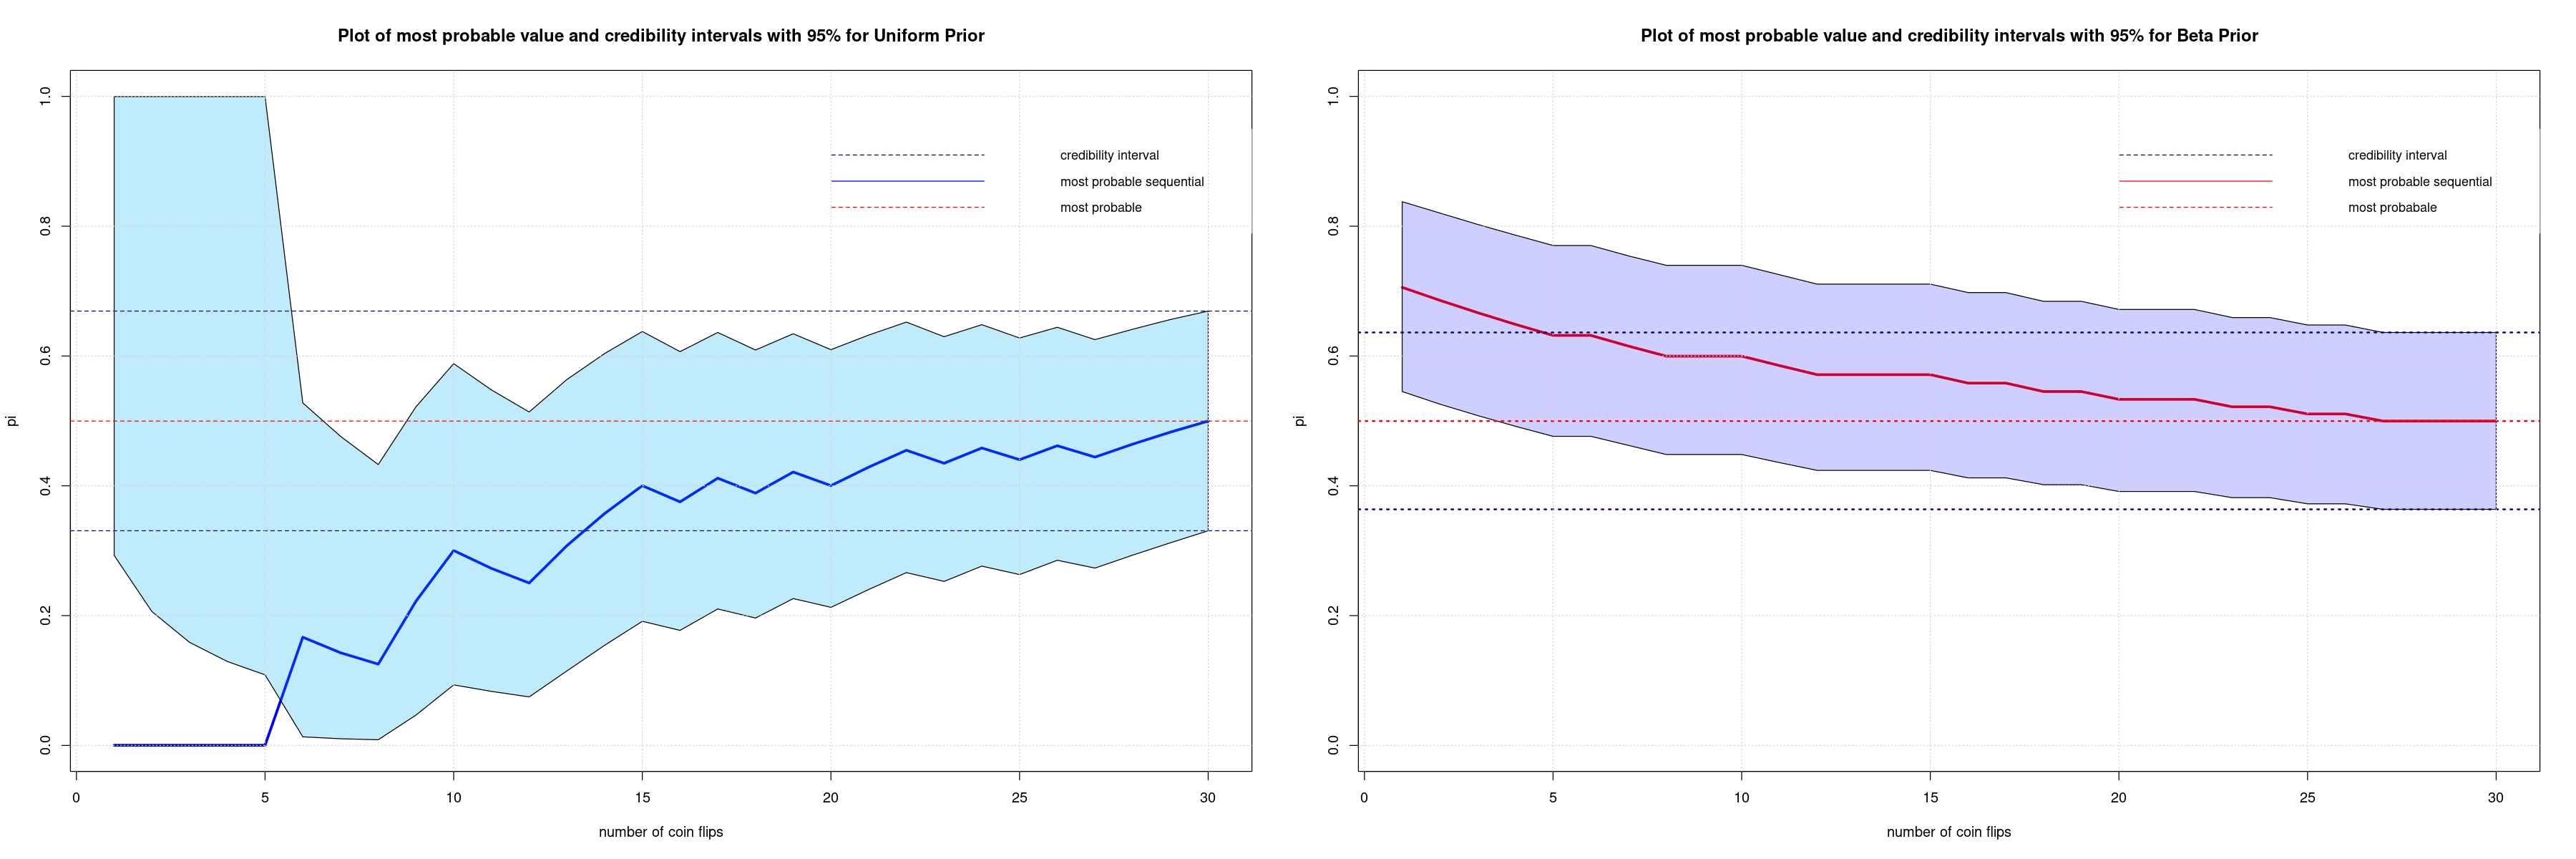

In [439]:
par(mfrow=c(1,2))
options(repr.plot.width=30, repr.plot.height=10)

#plot for flat
plot(n.seq, max.flat.seq, type="l", lwd=3, ylim=c(0, 1), xlab="number of coin flips", ylab="pi", col="blue", main="Plot of most probable value and credibility intervals with 95% for Uniform Prior")
    polygon(c(n.seq,rev(n.seq)), c(x1.flat.seq,rev(x2.flat.seq)), col="#00b0f040")
    abline(h=c(max.flat, x.flat["lower"], x.flat["upper"]), lty=c(2,2,2), col=c("red","navy","navy"))
    legend(18, 0.95, legend=c("credibility interval","most probable sequential","most probable"), 
     col=c("navy","blue","red"), lty=2:1, cex=0.9,box.lty=0)
    grid()


#plot for beta
plot(n.seq, max.beta.seq, type="l", lwd=3, ylim=c(0, 1), xlab="number of coin flips", ylab="pi", col="red", main="Plot of most probable value and credibility intervals with 95% for Beta Prior")
    polygon(c(n.seq,rev(n.seq)), c(x1.beta.seq,rev(x2.beta.seq)), col="#0000ff30")
    abline(h=c(max.beta, x.beta["lower"], x.beta["upper"]), lty=c(3,3,3), lwd=c(2,2,2), col=c("red","navy","navy"))
    legend(18, 0.95, legend=c("credibility interval","most probable sequential","most probabale"), 
     col=c("navy","red","red"), lty=2:1, cex=0.9,box.lty=0)
    grid()

#### d) Do you get a different result, by analyzing the data sequentially with respect to a one-step analysis (i.e. considering all the data as a whole) ?

Now we can conclued that the two posterior distributions are dependent on the number of extractions because as we saw in the previous part up to the fifth extraction, most probable result for the probability $\pi$ was very far from maximum probable value. As the number of flips grow, we see that the result tends to the expected value for a fair coin.

## Exersice 4

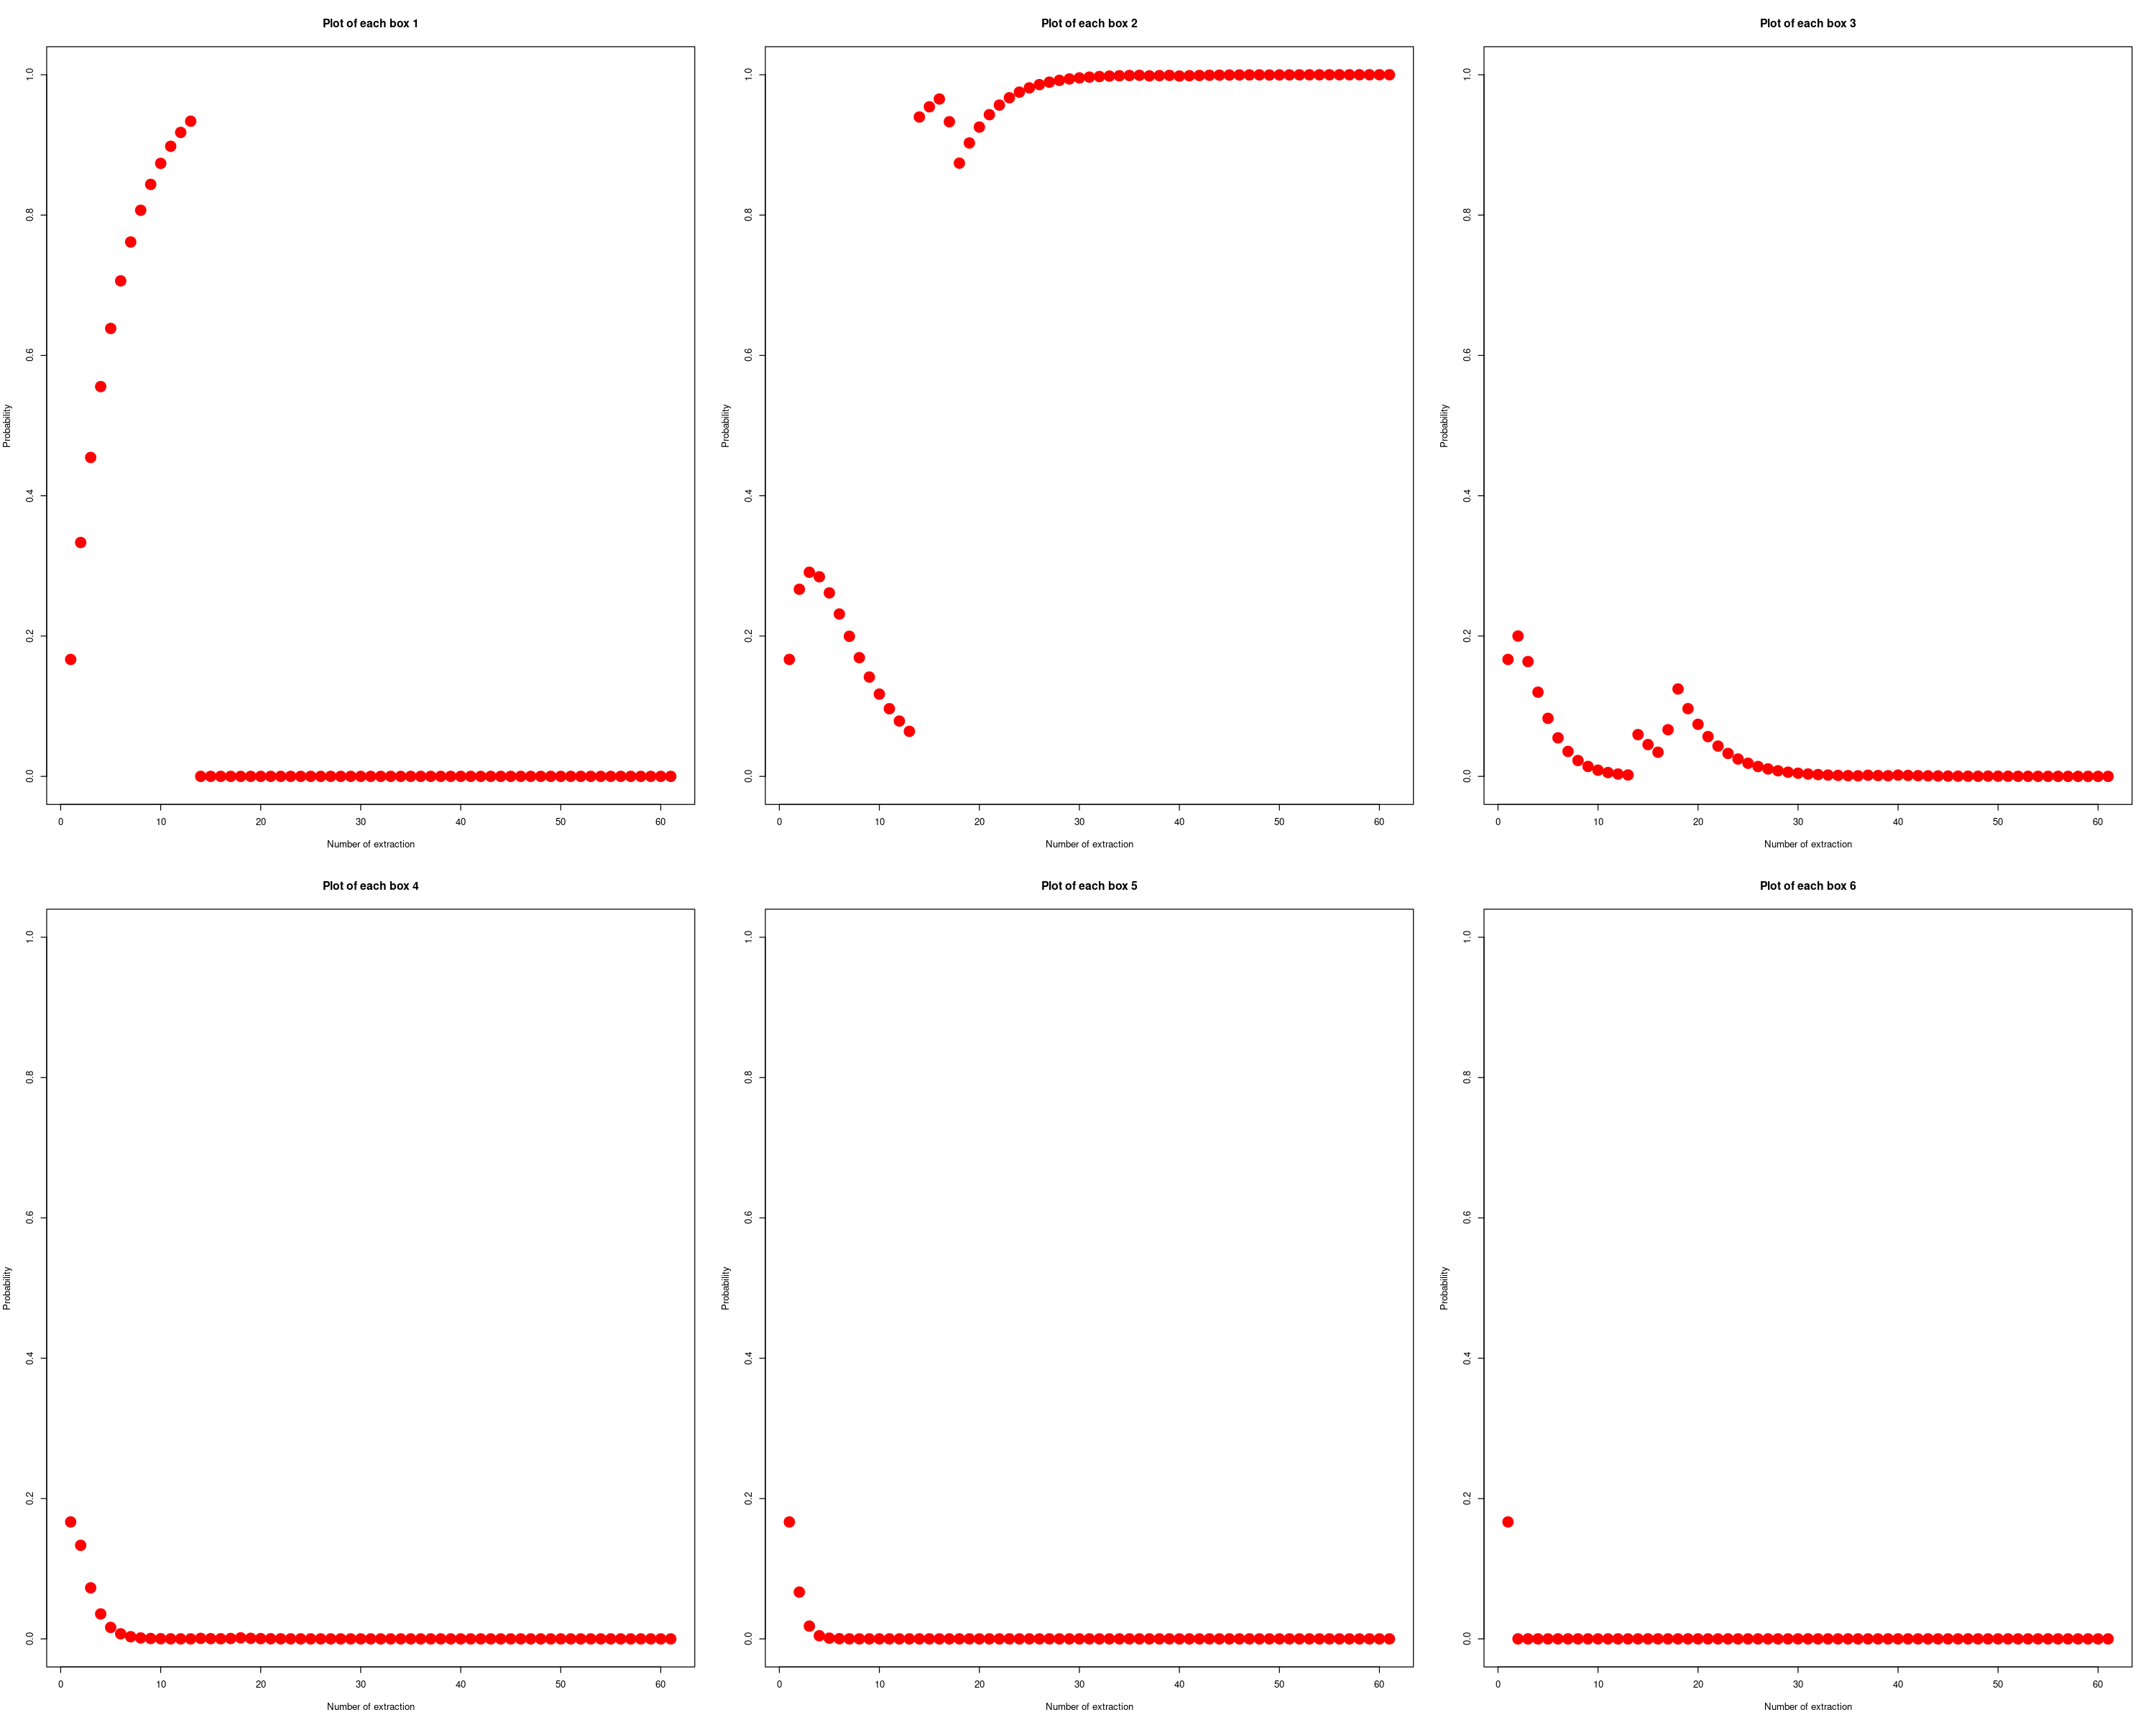

In [465]:
#H0 <- c('b','b','b','b','b')
#H1 <- c('w','b','b','b','b')
#H2 <- c('w','w','b','b','b')
#H3 <- c('w','w','w','b','b')
#H4 <- c('w','w','w','w','b')
#H5 <- c('w','w','w','w','w')

set.seed(89540)  
num_b <- 6   # number of box
num_ex <- 60  # number of extractions

# first choose a box then extract 
box <- floor(runif(1, min=0, max=num_b))
extraction <- (floor(runif(num_ex, min=0, max=num_b-1)) < box)


# compute the probability of choosing each box
prob <- matrix(0, num_b, num_ex+1)
prob[,1] = 1/num_b

# following function update probability for each extraction 
for (i in 1:num_ex) {
    if (extraction[i]) {
        prob[,i+1] <- ((1:num_b)-1)*1/(num_b-1)*prob[,i]/sum(((1:num_b)-1)*1/(num_b-1)*prob[,i])
    } else {
        prob[,i+1] <- (((num_b:1)-1)*1/(num_b-1))*prob[,i]/sum(((num_b:1)-1)*1/(num_b-1)*prob[,i])
    }
}

# Create data frame from all the variables
prob_frame = as.data.frame(t(prob))
prob_frame = cbind(prob_frame[1:num_ex,], extraction)
for (i in 1:num_ex) {
     if (prob_frame$extraction[i]) prob_frame$extraction[i] = "White" 
     else prob_frame$extraction[i] = "Black"
     #print(prob_frame$extraction)
}

#plotting part

par(mfrow=c(2,3))
options(repr.plot.width=12, repr.plot.height=8)

for (i in 1:num_b) {
    plot(1:(num_ex+1), prob[i,], ylim=c(0, 1), 
        main = paste("Plot of each box", i),  lty=2, lwd = 8,xlab='Number of extraction', ylab='Probability', col="red")
        options(repr.plot.width=25, repr.plot.height=20)  
}


  